In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import data 2018
dataset=pd.read_csv('mlbnew.txt')


# Split "Pos Summary" column to obtain Original Position
dataset[['OriginalPosition',
             '2ndPosition',
             '3rdPosition',
             '4thPosition',
             '5thPosition',
             '6thPosition',
             '7thPosition']] = dataset['Pos Summary'].str.split('-',expand=True)


dataset=dataset.drop(['Pos Summary'],axis=1)
# dataset=dataset.drop(dataset.index[-1])



# dataset.isnull().any()
for column in dataset.columns[14:20]:
    dataset[column].fillna(0,inplace=True)  

dataset.isnull().any()

X=dataset.iloc[:,5:21].values
y=dataset.OriginalPosition






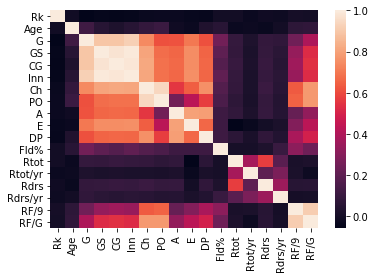

In [2]:
import seaborn as sns
Var_Corr = dataset.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

labelbinarizer_y=LabelBinarizer()
y=labelbinarizer_y.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)


sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


print(X_train)
print(y_train)

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


[[ 0.5021924  -0.72028022 -0.59505465 ...  0.06586001 -0.60709035
  -0.77190939]
 [-0.02175237 -0.72028022 -0.59505465 ...  0.06586001 -0.58335986
  -0.74997517]
 [ 0.09214867 -0.0041352  -0.03187404 ... -0.30820304  0.32235366
   0.24583827]
 ...
 [-1.06964192 -0.69790068 -0.59505465 ...  0.06586001 -1.12916102
  -0.81577782]
 [ 1.57286216  1.18197999  1.04551497 ... -0.21468728  0.40541036
   0.43447254]
 [-0.47735652 -0.72028022 -0.59505465 ...  0.06586001 -0.56358446
  -0.71926727]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
(3258, 16)
(3258, 7)
(815, 16)
(815, 7)


In [4]:
#Importing keras and classes
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop

# Initializing the ANN
classifier=Sequential()

#Initial Layer and First Hidden Layer
classifier.add(Dense(input_dim=16,kernel_initializer ='uniform',activation ='relu',units=11))

#Second Hidden Layer
classifier.add(Dense(units=11,kernel_initializer ='uniform',activation ='relu'))

#Output Layer
classifier.add(Dense(units=7,kernel_initializer ='uniform',activation ='softmax'))

#Compile ANN
classifier.compile(optimizer='Adam',
loss='categorical_crossentropy',
metrics=['accuracy'])



Using TensorFlow backend.


Train on 3258 samples, validate on 815 samples
Epoch 1/500
3258/3258 [==============================] - 1s 253us/step - loss: 1.6560 - acc: 0.5945 - val_loss: 1.0979 - val_acc: 0.6319
Epoch 2/500
3258/3258 [==============================] - 0s 60us/step - loss: 0.9488 - acc: 0.6467 - val_loss: 0.8152 - val_acc: 0.6920
Epoch 3/500
3258/3258 [==============================] - 0s 63us/step - loss: 0.7331 - acc: 0.7284 - val_loss: 0.6407 - val_acc: 0.7644
Epoch 4/500
3258/3258 [==============================] - 0s 65us/step - loss: 0.6189 - acc: 0.7514 - val_loss: 0.5798 - val_acc: 0.7816
Epoch 5/500
3258/3258 [==============================] - 0s 64us/step - loss: 0.5631 - acc: 0.7603 - val_loss: 0.5433 - val_acc: 0.7975
Epoch 6/500
3258/3258 [==============================] - 0s 60us/step - loss: 0.5244 - acc: 0.7775 - val_loss: 0.5075 - val_acc: 0.8307
Epoch 7/500
3258/3258 [==============================] - 0s 60us/step - loss: 0.4809 - acc: 0.8079 - val_loss: 0.4802 - val_acc: 0.8405


3258/3258 [==============================] - 0s 56us/step - loss: 0.2031 - acc: 0.9217 - val_loss: 0.2780 - val_acc: 0.8994
Epoch 61/500
3258/3258 [==============================] - 0s 52us/step - loss: 0.2022 - acc: 0.9227 - val_loss: 0.2709 - val_acc: 0.9031
Epoch 62/500
3258/3258 [==============================] - 0s 52us/step - loss: 0.1991 - acc: 0.9233 - val_loss: 0.2738 - val_acc: 0.9043
Epoch 63/500
3258/3258 [==============================] - 0s 46us/step - loss: 0.2005 - acc: 0.9245 - val_loss: 0.2716 - val_acc: 0.9055
Epoch 64/500
3258/3258 [==============================] - 0s 50us/step - loss: 0.1986 - acc: 0.9248 - val_loss: 0.2694 - val_acc: 0.9129
Epoch 65/500
3258/3258 [==============================] - 0s 53us/step - loss: 0.1962 - acc: 0.9233 - val_loss: 0.2684 - val_acc: 0.9092
Epoch 66/500
3258/3258 [==============================] - 0s 52us/step - loss: 0.1970 - acc: 0.9242 - val_loss: 0.2687 - val_acc: 0.9055
Epoch 67/500
3258/3258 [==============================

Epoch 120/500
3258/3258 [==============================] - 0s 46us/step - loss: 0.1698 - acc: 0.9352 - val_loss: 0.2599 - val_acc: 0.9178
Epoch 121/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1698 - acc: 0.9352 - val_loss: 0.2581 - val_acc: 0.9141
Epoch 122/500
3258/3258 [==============================] - 0s 47us/step - loss: 0.1698 - acc: 0.9352 - val_loss: 0.2562 - val_acc: 0.9166
Epoch 123/500
3258/3258 [==============================] - 0s 41us/step - loss: 0.1713 - acc: 0.9309 - val_loss: 0.2561 - val_acc: 0.9190
Epoch 124/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1680 - acc: 0.9343 - val_loss: 0.2581 - val_acc: 0.9141
Epoch 125/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1691 - acc: 0.9359 - val_loss: 0.2562 - val_acc: 0.9129
Epoch 126/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1685 - acc: 0.9346 - val_loss: 0.2612 - val_acc: 0.9178
Epoch 127/500
3258/3258 [=========

3258/3258 [==============================] - 0s 43us/step - loss: 0.1563 - acc: 0.9377 - val_loss: 0.2585 - val_acc: 0.9129
Epoch 180/500
3258/3258 [==============================] - 0s 42us/step - loss: 0.1580 - acc: 0.9383 - val_loss: 0.2683 - val_acc: 0.9227
Epoch 181/500
3258/3258 [==============================] - 0s 46us/step - loss: 0.1575 - acc: 0.9401 - val_loss: 0.2614 - val_acc: 0.9153
Epoch 182/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1572 - acc: 0.9359 - val_loss: 0.2626 - val_acc: 0.9166
Epoch 183/500
3258/3258 [==============================] - 0s 41us/step - loss: 0.1589 - acc: 0.9395 - val_loss: 0.2640 - val_acc: 0.9190
Epoch 184/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1574 - acc: 0.9401 - val_loss: 0.2607 - val_acc: 0.9117
Epoch 185/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1587 - acc: 0.9374 - val_loss: 0.2680 - val_acc: 0.9129
Epoch 186/500
3258/3258 [=======================

3258/3258 [==============================] - 0s 43us/step - loss: 0.1490 - acc: 0.9432 - val_loss: 0.2803 - val_acc: 0.9141
Epoch 239/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1509 - acc: 0.9420 - val_loss: 0.2765 - val_acc: 0.9117
Epoch 240/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1506 - acc: 0.9398 - val_loss: 0.2741 - val_acc: 0.9190
Epoch 241/500
3258/3258 [==============================] - 0s 44us/step - loss: 0.1491 - acc: 0.9435 - val_loss: 0.2727 - val_acc: 0.9202
Epoch 242/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1492 - acc: 0.9426 - val_loss: 0.2684 - val_acc: 0.9166
Epoch 243/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1480 - acc: 0.9451 - val_loss: 0.2711 - val_acc: 0.9239
Epoch 244/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1496 - acc: 0.9429 - val_loss: 0.2724 - val_acc: 0.9166
Epoch 245/500
3258/3258 [=======================

3258/3258 [==============================] - 0s 48us/step - loss: 0.1451 - acc: 0.9435 - val_loss: 0.2751 - val_acc: 0.9202
Epoch 298/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1451 - acc: 0.9454 - val_loss: 0.2764 - val_acc: 0.9202
Epoch 299/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1442 - acc: 0.9448 - val_loss: 0.2844 - val_acc: 0.9166
Epoch 300/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1430 - acc: 0.9441 - val_loss: 0.2866 - val_acc: 0.9141
Epoch 301/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1428 - acc: 0.9444 - val_loss: 0.2691 - val_acc: 0.9227
Epoch 302/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1409 - acc: 0.9463 - val_loss: 0.2918 - val_acc: 0.9092
Epoch 303/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1437 - acc: 0.9460 - val_loss: 0.2775 - val_acc: 0.9178
Epoch 304/500
3258/3258 [=======================

3258/3258 [==============================] - 0s 55us/step - loss: 0.1377 - acc: 0.9481 - val_loss: 0.2916 - val_acc: 0.9153
Epoch 357/500
3258/3258 [==============================] - 0s 50us/step - loss: 0.1369 - acc: 0.9475 - val_loss: 0.2824 - val_acc: 0.9239
Epoch 358/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1384 - acc: 0.9466 - val_loss: 0.2823 - val_acc: 0.9153
Epoch 359/500
3258/3258 [==============================] - 0s 53us/step - loss: 0.1373 - acc: 0.9472 - val_loss: 0.2974 - val_acc: 0.9166
Epoch 360/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1370 - acc: 0.9484 - val_loss: 0.2844 - val_acc: 0.9166
Epoch 361/500
3258/3258 [==============================] - 0s 59us/step - loss: 0.1375 - acc: 0.9460 - val_loss: 0.2839 - val_acc: 0.9166
Epoch 362/500
3258/3258 [==============================] - 0s 71us/step - loss: 0.1372 - acc: 0.9497 - val_loss: 0.2883 - val_acc: 0.9190
Epoch 363/500
3258/3258 [=======================

3258/3258 [==============================] - 0s 43us/step - loss: 0.1348 - acc: 0.9481 - val_loss: 0.2905 - val_acc: 0.9153
Epoch 416/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1334 - acc: 0.9521 - val_loss: 0.2894 - val_acc: 0.9276
Epoch 417/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1351 - acc: 0.9478 - val_loss: 0.2987 - val_acc: 0.9190
Epoch 418/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1336 - acc: 0.9494 - val_loss: 0.2949 - val_acc: 0.9215
Epoch 419/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1326 - acc: 0.9500 - val_loss: 0.2894 - val_acc: 0.9227
Epoch 420/500
3258/3258 [==============================] - 0s 47us/step - loss: 0.1345 - acc: 0.9484 - val_loss: 0.2948 - val_acc: 0.9215
Epoch 421/500
3258/3258 [==============================] - 0s 62us/step - loss: 0.1341 - acc: 0.9503 - val_loss: 0.2977 - val_acc: 0.9129
Epoch 422/500
3258/3258 [=======================

3258/3258 [==============================] - 0s 43us/step - loss: 0.1312 - acc: 0.9487 - val_loss: 0.2992 - val_acc: 0.9141
Epoch 475/500
3258/3258 [==============================] - 0s 48us/step - loss: 0.1314 - acc: 0.9500 - val_loss: 0.2937 - val_acc: 0.9190
Epoch 476/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1310 - acc: 0.9521 - val_loss: 0.2875 - val_acc: 0.9227
Epoch 477/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1309 - acc: 0.9515 - val_loss: 0.3090 - val_acc: 0.9166
Epoch 478/500
3258/3258 [==============================] - 0s 47us/step - loss: 0.1293 - acc: 0.9530 - val_loss: 0.3017 - val_acc: 0.9190
Epoch 479/500
3258/3258 [==============================] - 0s 44us/step - loss: 0.1294 - acc: 0.9521 - val_loss: 0.2945 - val_acc: 0.9215
Epoch 480/500
3258/3258 [==============================] - 0s 43us/step - loss: 0.1292 - acc: 0.9481 - val_loss: 0.2940 - val_acc: 0.9202
Epoch 481/500
3258/3258 [=======================

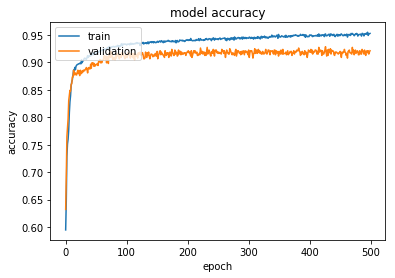

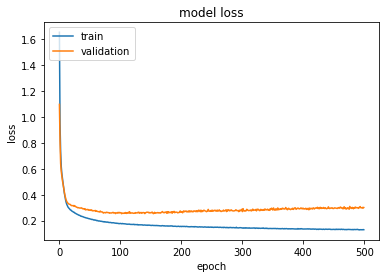

In [5]:
#Fit Training Set to ANN
history = classifier.fit(X_train,y_train,batch_size=25,epochs=500, validation_data=(X_test,y_test))

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [7]:
classifier.save("our_model")
classifier.save_weights("our_model_weights")

In [5]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

#Selecting parameters to improve and the options
parameters={'batch_size': [25,32],
            'epochs':[100,500],
            'optimizer':['adam','rmsprop']}

from sklearn.model_selection import GridSearchCV
def build_classifier(optimizer):
    classifier=Sequential()
    classifier.add(Dense(units=11,kernel_initializer ='uniform' ,activation ='relu',input_dim=16))
    classifier.add(Dense(units=11,kernel_initializer ='uniform' ,activation ='relu'))
    classifier.add(Dense(units=7,kernel_initializer ='uniform' ,activation ='sigmoid'))
    classifier.compile(optimizer=optimizer,
    loss='categorical_crossentropy',metrics=['accuracy'])
    return classifier
    
#Assign KerasClassifier    
classifier=KerasClassifier(build_fn=build_classifier)

#Setting up Grid Search
grid_search=GridSearchCV(estimator=classifier,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10)

#Fit and initiate Grid Search on our ANN
grid_search=grid_search.fit(X_train,labelbinarizer_y.inverse_transform(y_train))

#Get best parameters
best_parameters=grid_search.best_params_

#Get best accuracy
best_accuracy=grid_search.best_score_

Epoch 1/100
2932/2932 [==============================] - 1s 466us/step - loss: 1.8451 - acc: 0.5501
Epoch 2/100
2932/2932 [==============================] - 0s 117us/step - loss: 1.1475 - acc: 0.6231
Epoch 3/100
2932/2932 [==============================] - 0s 104us/step - loss: 0.8745 - acc: 0.6647
Epoch 4/100
2932/2932 [==============================] - 0s 112us/step - loss: 0.7335 - acc: 0.7254
Epoch 5/100
2932/2932 [==============================] - 0s 108us/step - loss: 0.6382 - acc: 0.7391
Epoch 6/100
2932/2932 [==============================] - 0s 110us/step - loss: 0.5832 - acc: 0.7466
Epoch 7/100
2932/2932 [==============================] - 0s 118us/step - loss: 0.5356 - acc: 0.7797
Epoch 8/100
2932/2932 [==============================] - 0s 99us/step - loss: 0.4840 - acc: 0.8254
Epoch 9/100
2932/2932 [==============================] - 0s 104us/step - loss: 0.4413 - acc: 0.8411
Epoch 10/100
2932/2932 [==============================] - 0s 113us/step - loss: 0.4095 - acc: 0.8516


2932/2932 [==============================] - 0s 93us/step - loss: 0.1973 - acc: 0.9226
Epoch 63/100
2932/2932 [==============================] - 0s 97us/step - loss: 0.1984 - acc: 0.9236
Epoch 64/100
2932/2932 [==============================] - 0s 95us/step - loss: 0.1952 - acc: 0.9222
Epoch 65/100
2932/2932 [==============================] - 0s 109us/step - loss: 0.1952 - acc: 0.9222
Epoch 66/100
2932/2932 [==============================] - 0s 102us/step - loss: 0.1943 - acc: 0.9202
Epoch 67/100
2932/2932 [==============================] - 0s 98us/step - loss: 0.1946 - acc: 0.9243
Epoch 68/100
2932/2932 [==============================] - 0s 92us/step - loss: 0.1933 - acc: 0.9226
Epoch 69/100
2932/2932 [==============================] - 0s 100us/step - loss: 0.1933 - acc: 0.9229
Epoch 70/100
2932/2932 [==============================] - 0s 98us/step - loss: 0.1910 - acc: 0.9243
Epoch 71/100
2932/2932 [==============================] - 0s 113us/step - loss: 0.1922 - acc: 0.9212
Epoch 72/

2932/2932 [==============================] - 0s 97us/step - loss: 0.2443 - acc: 0.9083
Epoch 44/100
2932/2932 [==============================] - 0s 110us/step - loss: 0.2418 - acc: 0.9045
Epoch 45/100
2932/2932 [==============================] - 0s 97us/step - loss: 0.2409 - acc: 0.9055
Epoch 46/100
2932/2932 [==============================] - 0s 100us/step - loss: 0.2378 - acc: 0.9079
Epoch 47/100
2932/2932 [==============================] - 0s 99us/step - loss: 0.2355 - acc: 0.9083
Epoch 48/100
2932/2932 [==============================] - 0s 94us/step - loss: 0.2335 - acc: 0.9086: 0s - loss: 0.2277 - acc: 0
Epoch 49/100
2932/2932 [==============================] - 0s 102us/step - loss: 0.2319 - acc: 0.9120
Epoch 50/100
2932/2932 [==============================] - 0s 96us/step - loss: 0.2304 - acc: 0.9103
Epoch 51/100
2932/2932 [==============================] - 0s 95us/step - loss: 0.2287 - acc: 0.9079
Epoch 52/100
2932/2932 [==============================] - 0s 96us/step - loss: 0.2

2932/2932 [==============================] - 0s 99us/step - loss: 0.8265 - acc: 0.6392
Epoch 6/100
2932/2932 [==============================] - 0s 118us/step - loss: 0.8054 - acc: 0.6835
Epoch 7/100
2932/2932 [==============================] - 0s 114us/step - loss: 0.7854 - acc: 0.6862
Epoch 8/100
2932/2932 [==============================] - 0s 121us/step - loss: 0.7615 - acc: 0.6756
Epoch 9/100
2932/2932 [==============================] - 0s 119us/step - loss: 0.7314 - acc: 0.6620
Epoch 10/100
2932/2932 [==============================] - 0s 115us/step - loss: 0.6714 - acc: 0.7179
Epoch 11/100
2932/2932 [==============================] - 0s 121us/step - loss: 0.5905 - acc: 0.7408
Epoch 12/100
2932/2932 [==============================] - 0s 120us/step - loss: 0.5543 - acc: 0.7490
Epoch 13/100
2932/2932 [==============================] - 0s 120us/step - loss: 0.5302 - acc: 0.7544
Epoch 14/100
2932/2932 [==============================] - 0s 109us/step - loss: 0.5109 - acc: 0.7589
Epoch 15

2932/2932 [==============================] - 0s 105us/step - loss: 0.1866 - acc: 0.9270
Epoch 87/100
2932/2932 [==============================] - 0s 115us/step - loss: 0.1860 - acc: 0.9253
Epoch 88/100
2932/2932 [==============================] - 0s 114us/step - loss: 0.1856 - acc: 0.9260
Epoch 89/100
2932/2932 [==============================] - 0s 115us/step - loss: 0.1848 - acc: 0.9277
Epoch 90/100
2932/2932 [==============================] - 0s 123us/step - loss: 0.1838 - acc: 0.9294
Epoch 91/100
2932/2932 [==============================] - 0s 116us/step - loss: 0.1830 - acc: 0.9301
Epoch 92/100
2932/2932 [==============================] - 0s 101us/step - loss: 0.1836 - acc: 0.9294
Epoch 93/100
2932/2932 [==============================] - 0s 110us/step - loss: 0.1830 - acc: 0.9239
Epoch 94/100
2932/2932 [==============================] - 0s 108us/step - loss: 0.1812 - acc: 0.9280
Epoch 95/100
2932/2932 [==============================] - 0s 114us/step - loss: 0.1811 - acc: 0.9270
Epo

2932/2932 [==============================] - 0s 101us/step - loss: 0.3088 - acc: 0.8626
Epoch 47/100
2932/2932 [==============================] - 0s 105us/step - loss: 0.3057 - acc: 0.8622
Epoch 48/100
2932/2932 [==============================] - 0s 109us/step - loss: 0.3034 - acc: 0.8632
Epoch 49/100
2932/2932 [==============================] - 0s 106us/step - loss: 0.2993 - acc: 0.8639
Epoch 50/100
2932/2932 [==============================] - 0s 98us/step - loss: 0.2960 - acc: 0.8670
Epoch 51/100
2932/2932 [==============================] - 0s 113us/step - loss: 0.2938 - acc: 0.8670
Epoch 52/100
2932/2932 [==============================] - 0s 126us/step - loss: 0.2914 - acc: 0.8653
Epoch 53/100
2932/2932 [==============================] - 0s 122us/step - loss: 0.2904 - acc: 0.8683
Epoch 54/100
2932/2932 [==============================] - 0s 113us/step - loss: 0.2864 - acc: 0.8704
Epoch 55/100
2932/2932 [==============================] - 0s 113us/step - loss: 0.2864 - acc: 0.8673
Epoc

2933/2933 [==============================] - 0s 126us/step - loss: 0.4339 - acc: 0.8258 0s - loss: 0.4610 - acc: 0.
Epoch 8/100
2933/2933 [==============================] - 0s 110us/step - loss: 0.4062 - acc: 0.8288 0s - loss: 0.4058 - acc: 0.829
Epoch 9/100
2933/2933 [==============================] - 0s 102us/step - loss: 0.3834 - acc: 0.8374
Epoch 10/100
2933/2933 [==============================] - 0s 107us/step - loss: 0.3650 - acc: 0.8609
Epoch 11/100
2933/2933 [==============================] - 0s 121us/step - loss: 0.3462 - acc: 0.8756
Epoch 12/100
2933/2933 [==============================] - 0s 106us/step - loss: 0.3309 - acc: 0.8817
Epoch 13/100
2933/2933 [==============================] - 0s 115us/step - loss: 0.3143 - acc: 0.8827
Epoch 14/100
2933/2933 [==============================] - 0s 92us/step - loss: 0.3024 - acc: 0.8841
Epoch 15/100
2933/2933 [==============================] - 0s 112us/step - loss: 0.2944 - acc: 0.8895
Epoch 16/100
2933/2933 [========================

2933/2933 [==============================] - 0s 117us/step - loss: 0.2488 - acc: 0.8817
Epoch 68/100
2933/2933 [==============================] - 0s 110us/step - loss: 0.2468 - acc: 0.8827
Epoch 69/100
2933/2933 [==============================] - 0s 102us/step - loss: 0.2466 - acc: 0.8796
Epoch 70/100
2933/2933 [==============================] - 0s 111us/step - loss: 0.2467 - acc: 0.8831
Epoch 71/100
2933/2933 [==============================] - 0s 106us/step - loss: 0.2442 - acc: 0.8844
Epoch 72/100
2933/2933 [==============================] - 0s 93us/step - loss: 0.2436 - acc: 0.8827
Epoch 73/100
2933/2933 [==============================] - 0s 114us/step - loss: 0.2416 - acc: 0.8858
Epoch 74/100
2933/2933 [==============================] - 0s 109us/step - loss: 0.2405 - acc: 0.8865
Epoch 75/100
2933/2933 [==============================] - 0s 115us/step - loss: 0.2406 - acc: 0.8865
Epoch 76/100
2933/2933 [==============================] - 0s 114us/step - loss: 0.2405 - acc: 0.8848
Epoc

2932/2932 [==============================] - 0s 102us/step - loss: 0.2787 - acc: 0.8605
Epoch 49/100
2932/2932 [==============================] - 0s 111us/step - loss: 0.2770 - acc: 0.8615
Epoch 50/100
2932/2932 [==============================] - 0s 107us/step - loss: 0.2755 - acc: 0.8632
Epoch 51/100
2932/2932 [==============================] - 0s 105us/step - loss: 0.2733 - acc: 0.8656
Epoch 52/100
2932/2932 [==============================] - 0s 99us/step - loss: 0.2689 - acc: 0.8636
Epoch 53/100
2932/2932 [==============================] - 0s 98us/step - loss: 0.2694 - acc: 0.8683
Epoch 54/100
2932/2932 [==============================] - 0s 96us/step - loss: 0.2629 - acc: 0.8895
Epoch 55/100
2932/2932 [==============================] - 0s 101us/step - loss: 0.2485 - acc: 0.8980
Epoch 56/100
2932/2932 [==============================] - 0s 100us/step - loss: 0.2433 - acc: 0.9011
Epoch 57/100
2932/2932 [==============================] - 0s 109us/step - loss: 0.2392 - acc: 0.9004
Epoch 

2932/2932 [==============================] - 0s 104us/step - loss: 0.3536 - acc: 0.8591
Epoch 29/100
2932/2932 [==============================] - 0s 114us/step - loss: 0.3448 - acc: 0.8653
Epoch 30/100
2932/2932 [==============================] - 0s 123us/step - loss: 0.3362 - acc: 0.8724
Epoch 31/100
2932/2932 [==============================] - 0s 106us/step - loss: 0.3282 - acc: 0.8776
Epoch 32/100
2932/2932 [==============================] - 0s 121us/step - loss: 0.3212 - acc: 0.8772
Epoch 33/100
2932/2932 [==============================] - 0s 100us/step - loss: 0.3148 - acc: 0.8776
Epoch 34/100
2932/2932 [==============================] - 0s 91us/step - loss: 0.3088 - acc: 0.8817
Epoch 35/100
2932/2932 [==============================] - 0s 119us/step - loss: 0.3043 - acc: 0.8776
Epoch 36/100
2932/2932 [==============================] - 0s 111us/step - loss: 0.2995 - acc: 0.8844
Epoch 37/100
2932/2932 [==============================] - 0s 98us/step - loss: 0.2955 - acc: 0.8868
Epoch

2932/2932 [==============================] - 0s 106us/step - loss: 0.2020 - acc: 0.9141
Epoch 88/100
2932/2932 [==============================] - 0s 131us/step - loss: 0.2016 - acc: 0.9171
Epoch 89/100
2932/2932 [==============================] - 0s 135us/step - loss: 0.2006 - acc: 0.9147
Epoch 90/100
2932/2932 [==============================] - 0s 127us/step - loss: 0.2000 - acc: 0.9137
Epoch 91/100
2932/2932 [==============================] - 0s 135us/step - loss: 0.2005 - acc: 0.9147
Epoch 92/100
2932/2932 [==============================] - 0s 129us/step - loss: 0.2009 - acc: 0.9164
Epoch 93/100
2932/2932 [==============================] - 0s 134us/step - loss: 0.1999 - acc: 0.9175
Epoch 94/100
2932/2932 [==============================] - 0s 133us/step - loss: 0.1994 - acc: 0.9141
Epoch 95/100
2932/2932 [==============================] - 0s 135us/step - loss: 0.1984 - acc: 0.9164
Epoch 96/100
2932/2932 [==============================] - 0s 137us/step - loss: 0.1983 - acc: 0.9205
Epo

2932/2932 [==============================] - 0s 116us/step - loss: 0.2965 - acc: 0.8595
Epoch 49/100
2932/2932 [==============================] - 0s 114us/step - loss: 0.2934 - acc: 0.8588
Epoch 50/100
2932/2932 [==============================] - 0s 112us/step - loss: 0.2917 - acc: 0.8608
Epoch 51/100
2932/2932 [==============================] - 0s 115us/step - loss: 0.2894 - acc: 0.8602
Epoch 52/100
2932/2932 [==============================] - 0s 123us/step - loss: 0.2873 - acc: 0.8608
Epoch 53/100
2932/2932 [==============================] - 0s 111us/step - loss: 0.2845 - acc: 0.8612
Epoch 54/100
2932/2932 [==============================] - 0s 123us/step - loss: 0.2828 - acc: 0.8643
Epoch 55/100
2932/2932 [==============================] - 0s 113us/step - loss: 0.2796 - acc: 0.8632
Epoch 56/100
2932/2932 [==============================] - 0s 115us/step - loss: 0.2786 - acc: 0.8632
Epoch 57/100
2932/2932 [==============================] - 0s 126us/step - loss: 0.2766 - acc: 0.8612
Epo

2932/2932 [==============================] - 0s 115us/step - loss: 0.4819 - acc: 0.8254
Epoch 9/100
2932/2932 [==============================] - 0s 121us/step - loss: 0.4463 - acc: 0.8182
Epoch 10/100
2932/2932 [==============================] - 0s 117us/step - loss: 0.4178 - acc: 0.8247
Epoch 11/100
2932/2932 [==============================] - 0s 120us/step - loss: 0.3953 - acc: 0.8271
Epoch 12/100
2932/2932 [==============================] - 0s 118us/step - loss: 0.3784 - acc: 0.8353
Epoch 13/100
2932/2932 [==============================] - 0s 113us/step - loss: 0.3645 - acc: 0.8370
Epoch 14/100
2932/2932 [==============================] - 0s 117us/step - loss: 0.3522 - acc: 0.8400
Epoch 15/100
2932/2932 [==============================] - 0s 115us/step - loss: 0.3442 - acc: 0.8435
Epoch 16/100
2932/2932 [==============================] - 0s 112us/step - loss: 0.3352 - acc: 0.8458
Epoch 17/100
2932/2932 [==============================] - 0s 119us/step - loss: 0.3273 - acc: 0.8489
Epoc

Epoch 66/100
2932/2932 [==============================] - 0s 137us/step - loss: 0.2511 - acc: 0.8731
Epoch 67/100
2932/2932 [==============================] - 0s 123us/step - loss: 0.2514 - acc: 0.8827
Epoch 68/100
2932/2932 [==============================] - 0s 118us/step - loss: 0.2501 - acc: 0.8765
Epoch 69/100
2932/2932 [==============================] - 0s 137us/step - loss: 0.2491 - acc: 0.8786
Epoch 70/100
2932/2932 [==============================] - 0s 135us/step - loss: 0.2473 - acc: 0.8799
Epoch 71/100
2932/2932 [==============================] - 0s 133us/step - loss: 0.2472 - acc: 0.8799
Epoch 72/100
2932/2932 [==============================] - 0s 134us/step - loss: 0.2461 - acc: 0.8823
Epoch 73/100
2932/2932 [==============================] - 0s 140us/step - loss: 0.2445 - acc: 0.8837
Epoch 74/100
2932/2932 [==============================] - 0s 129us/step - loss: 0.2430 - acc: 0.8827
Epoch 75/100
2932/2932 [==============================] - 0s 117us/step - loss: 0.2423 - ac

2933/2933 [==============================] - 0s 105us/step - loss: 0.3267 - acc: 0.8814
Epoch 28/100
2933/2933 [==============================] - 0s 107us/step - loss: 0.3203 - acc: 0.8800
Epoch 29/100
2933/2933 [==============================] - 0s 113us/step - loss: 0.3132 - acc: 0.8834
Epoch 30/100
2933/2933 [==============================] - 0s 137us/step - loss: 0.3054 - acc: 0.8817
Epoch 31/100
2933/2933 [==============================] - 0s 124us/step - loss: 0.2990 - acc: 0.8848
Epoch 32/100
2933/2933 [==============================] - 0s 113us/step - loss: 0.2951 - acc: 0.8871
Epoch 33/100
2933/2933 [==============================] - 0s 105us/step - loss: 0.2909 - acc: 0.8871
Epoch 34/100
2933/2933 [==============================] - 0s 127us/step - loss: 0.2890 - acc: 0.8923
Epoch 35/100
2933/2933 [==============================] - 0s 128us/step - loss: 0.2860 - acc: 0.8906
Epoch 36/100
2933/2933 [==============================] - 0s 133us/step - loss: 0.2840 - acc: 0.8889
Epo

2932/2932 [==============================] - 0s 111us/step - loss: 0.5835 - acc: 0.6930
Epoch 9/500
2932/2932 [==============================] - 0s 123us/step - loss: 0.5661 - acc: 0.7329
Epoch 10/500
2932/2932 [==============================] - 0s 112us/step - loss: 0.5510 - acc: 0.7589
Epoch 11/500
2932/2932 [==============================] - 0s 111us/step - loss: 0.5330 - acc: 0.7807
Epoch 12/500
2932/2932 [==============================] - 0s 111us/step - loss: 0.4929 - acc: 0.7916
Epoch 13/500
2932/2932 [==============================] - 0s 111us/step - loss: 0.4669 - acc: 0.7930
Epoch 14/500
2932/2932 [==============================] - 0s 109us/step - loss: 0.4535 - acc: 0.8012
Epoch 15/500
2932/2932 [==============================] - 0s 112us/step - loss: 0.4415 - acc: 0.7995
Epoch 16/500
2932/2932 [==============================] - 0s 112us/step - loss: 0.4325 - acc: 0.8151
Epoch 17/500
2932/2932 [==============================] - 0s 112us/step - loss: 0.4239 - acc: 0.8151
Epoc

2932/2932 [==============================] - 0s 118us/step - loss: 0.1491 - acc: 0.9427
Epoch 169/500
2932/2932 [==============================] - 0s 125us/step - loss: 0.1483 - acc: 0.9430
Epoch 170/500
2932/2932 [==============================] - 0s 107us/step - loss: 0.1470 - acc: 0.9424
Epoch 171/500
2932/2932 [==============================] - 0s 113us/step - loss: 0.1478 - acc: 0.9424
Epoch 172/500
2932/2932 [==============================] - 0s 136us/step - loss: 0.1459 - acc: 0.9454
Epoch 173/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.1457 - acc: 0.9444
Epoch 174/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1457 - acc: 0.9430
Epoch 175/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1465 - acc: 0.9454
Epoch 176/500
2932/2932 [==============================] - 0s 116us/step - loss: 0.1445 - acc: 0.9454
Epoch 177/500
2932/2932 [==============================] - 0s 133us/step - loss: 0.1449 - acc: 0

2932/2932 [==============================] - 0s 122us/step - loss: 0.1264 - acc: 0.9540
Epoch 328/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1251 - acc: 0.9540
Epoch 329/500
2932/2932 [==============================] - 0s 129us/step - loss: 0.1248 - acc: 0.9540
Epoch 330/500
2932/2932 [==============================] - 0s 120us/step - loss: 0.1261 - acc: 0.9523
Epoch 331/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1230 - acc: 0.9529
Epoch 332/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1250 - acc: 0.9536
Epoch 333/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1267 - acc: 0.9523
Epoch 334/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1250 - acc: 0.9526
Epoch 335/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1249 - acc: 0.9529
Epoch 336/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1282 - acc: 0

2932/2932 [==============================] - 0s 123us/step - loss: 0.1212 - acc: 0.9526
Epoch 487/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1182 - acc: 0.9543
Epoch 488/500
2932/2932 [==============================] - 0s 135us/step - loss: 0.1182 - acc: 0.9567
Epoch 489/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1213 - acc: 0.9502
Epoch 490/500
2932/2932 [==============================] - 0s 128us/step - loss: 0.1180 - acc: 0.9574
Epoch 491/500
2932/2932 [==============================] - 0s 129us/step - loss: 0.1179 - acc: 0.9567
Epoch 492/500
2932/2932 [==============================] - 0s 130us/step - loss: 0.1177 - acc: 0.9550
Epoch 493/500
2932/2932 [==============================] - 0s 118us/step - loss: 0.1173 - acc: 0.9567
Epoch 494/500
2932/2932 [==============================] - 0s 120us/step - loss: 0.1172 - acc: 0.9557
Epoch 495/500
2932/2932 [==============================] - 0s 121us/step - loss: 0.1175 - acc: 0

2932/2932 [==============================] - 0s 131us/step - loss: 0.1879 - acc: 0.9205
Epoch 146/500
2932/2932 [==============================] - 0s 130us/step - loss: 0.1869 - acc: 0.9212
Epoch 147/500
2932/2932 [==============================] - 0s 131us/step - loss: 0.1877 - acc: 0.9212
Epoch 148/500
2932/2932 [==============================] - 0s 137us/step - loss: 0.1856 - acc: 0.9263
Epoch 149/500
2932/2932 [==============================] - 0s 135us/step - loss: 0.1852 - acc: 0.9222
Epoch 150/500
2932/2932 [==============================] - 0s 127us/step - loss: 0.1846 - acc: 0.9243
Epoch 151/500
2932/2932 [==============================] - 0s 132us/step - loss: 0.1856 - acc: 0.9209
Epoch 152/500
2932/2932 [==============================] - 0s 128us/step - loss: 0.1848 - acc: 0.9277
Epoch 153/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1841 - acc: 0.9243
Epoch 154/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1831 - acc: 0

2932/2932 [==============================] - 0s 129us/step - loss: 0.1526 - acc: 0.9393
Epoch 304/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1539 - acc: 0.9400
Epoch 305/500
2932/2932 [==============================] - 0s 136us/step - loss: 0.1544 - acc: 0.9342
Epoch 306/500
2932/2932 [==============================] - 0s 130us/step - loss: 0.1543 - acc: 0.9369
Epoch 307/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1537 - acc: 0.9372
Epoch 308/500
2932/2932 [==============================] - 0s 120us/step - loss: 0.1533 - acc: 0.9372
Epoch 309/500
2932/2932 [==============================] - 0s 128us/step - loss: 0.1528 - acc: 0.9379
Epoch 310/500
2932/2932 [==============================] - 0s 131us/step - loss: 0.1522 - acc: 0.9400
Epoch 311/500
2932/2932 [==============================] - 0s 129us/step - loss: 0.1534 - acc: 0.9376
Epoch 312/500
2932/2932 [==============================] - 0s 132us/step - loss: 0.1527 - acc: 0

2932/2932 [==============================] - 0s 137us/step - loss: 0.1394 - acc: 0.9434 0s - loss: 0.1543 - acc: 
Epoch 464/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1407 - acc: 0.9444
Epoch 465/500
2932/2932 [==============================] - 0s 133us/step - loss: 0.1415 - acc: 0.9465
Epoch 466/500
2932/2932 [==============================] - 0s 136us/step - loss: 0.1386 - acc: 0.9427
Epoch 467/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1388 - acc: 0.9478
Epoch 468/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1420 - acc: 0.9441
Epoch 469/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.1420 - acc: 0.9441
Epoch 470/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1371 - acc: 0.9465
Epoch 471/500
2932/2932 [==============================] - 0s 135us/step - loss: 0.1416 - acc: 0.9434
Epoch 472/500
2932/2932 [==============================] - 0s 139us/st

2932/2932 [==============================] - 0s 134us/step - loss: 0.1817 - acc: 0.9188
Epoch 122/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1819 - acc: 0.9209
Epoch 123/500
2932/2932 [==============================] - 0s 139us/step - loss: 0.1819 - acc: 0.9178
Epoch 124/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1801 - acc: 0.9192
Epoch 125/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1812 - acc: 0.9188
Epoch 126/500
2932/2932 [==============================] - 0s 137us/step - loss: 0.1792 - acc: 0.9151
Epoch 127/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1790 - acc: 0.9195
Epoch 128/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1785 - acc: 0.9168
Epoch 129/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1788 - acc: 0.9233
Epoch 130/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1771 - acc: 0

2932/2932 [==============================] - 0s 122us/step - loss: 0.1450 - acc: 0.9420
Epoch 281/500
2932/2932 [==============================] - 0s 132us/step - loss: 0.1448 - acc: 0.9430
Epoch 282/500
2932/2932 [==============================] - 0s 121us/step - loss: 0.1442 - acc: 0.9430
Epoch 283/500
2932/2932 [==============================] - 0s 132us/step - loss: 0.1445 - acc: 0.9417
Epoch 284/500
2932/2932 [==============================] - 0s 133us/step - loss: 0.1443 - acc: 0.9420
Epoch 285/500
2932/2932 [==============================] - 0s 136us/step - loss: 0.1460 - acc: 0.9420
Epoch 286/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1447 - acc: 0.9393
Epoch 287/500
2932/2932 [==============================] - 0s 139us/step - loss: 0.1447 - acc: 0.9413
Epoch 288/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1435 - acc: 0.9420
Epoch 289/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1447 - acc: 0

2932/2932 [==============================] - 0s 120us/step - loss: 0.1275 - acc: 0.9502
Epoch 441/500
2932/2932 [==============================] - 0s 137us/step - loss: 0.1278 - acc: 0.9523
Epoch 442/500
2932/2932 [==============================] - 0s 131us/step - loss: 0.1281 - acc: 0.9505
Epoch 443/500
2932/2932 [==============================] - 0s 129us/step - loss: 0.1314 - acc: 0.9492
Epoch 444/500
2932/2932 [==============================] - 0s 131us/step - loss: 0.1288 - acc: 0.9492
Epoch 445/500
2932/2932 [==============================] - 0s 126us/step - loss: 0.1269 - acc: 0.9523
Epoch 446/500
2932/2932 [==============================] - 0s 129us/step - loss: 0.1297 - acc: 0.9482
Epoch 447/500
2932/2932 [==============================] - 0s 135us/step - loss: 0.1282 - acc: 0.9502
Epoch 448/500
2932/2932 [==============================] - 0s 131us/step - loss: 0.1283 - acc: 0.9502
Epoch 449/500
2932/2932 [==============================] - 0s 125us/step - loss: 0.1282 - acc: 0

2932/2932 [==============================] - 0s 123us/step - loss: 0.1883 - acc: 0.9246 0s - loss: 0.2059 - acc: 0
Epoch 101/500
2932/2932 [==============================] - 0s 128us/step - loss: 0.1863 - acc: 0.9260
Epoch 102/500
2932/2932 [==============================] - 0s 136us/step - loss: 0.1875 - acc: 0.9260
Epoch 103/500
2932/2932 [==============================] - 0s 129us/step - loss: 0.1863 - acc: 0.9287
Epoch 104/500
2932/2932 [==============================] - 0s 126us/step - loss: 0.1862 - acc: 0.9274
Epoch 105/500
2932/2932 [==============================] - 0s 131us/step - loss: 0.1854 - acc: 0.9253
Epoch 106/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1848 - acc: 0.9274
Epoch 107/500
2932/2932 [==============================] - 0s 136us/step - loss: 0.1843 - acc: 0.9280
Epoch 108/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1847 - acc: 0.9253
Epoch 109/500
2932/2932 [==============================] - 0s 142us/s

2932/2932 [==============================] - 0s 128us/step - loss: 0.1506 - acc: 0.9366
Epoch 259/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1492 - acc: 0.9396
Epoch 260/500
2932/2932 [==============================] - 0s 136us/step - loss: 0.1500 - acc: 0.9389
Epoch 261/500
2932/2932 [==============================] - 0s 130us/step - loss: 0.1500 - acc: 0.9393
Epoch 262/500
2932/2932 [==============================] - 0s 135us/step - loss: 0.1493 - acc: 0.9379
Epoch 263/500
2932/2932 [==============================] - 0s 124us/step - loss: 0.1517 - acc: 0.9369
Epoch 264/500
2932/2932 [==============================] - 0s 128us/step - loss: 0.1499 - acc: 0.9400
Epoch 265/500
2932/2932 [==============================] - 0s 132us/step - loss: 0.1497 - acc: 0.9420
Epoch 266/500
2932/2932 [==============================] - 0s 135us/step - loss: 0.1510 - acc: 0.9403
Epoch 267/500
2932/2932 [==============================] - 0s 127us/step - loss: 0.1510 - acc: 0

2932/2932 [==============================] - 0s 67us/step - loss: 0.1373 - acc: 0.9461
Epoch 416/500
2932/2932 [==============================] - 0s 110us/step - loss: 0.1371 - acc: 0.9434
Epoch 417/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1390 - acc: 0.9447
Epoch 418/500
2932/2932 [==============================] - 0s 139us/step - loss: 0.1393 - acc: 0.9427
Epoch 419/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1377 - acc: 0.9451
Epoch 420/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1391 - acc: 0.9420
Epoch 421/500
2932/2932 [==============================] - 0s 135us/step - loss: 0.1377 - acc: 0.9458
Epoch 422/500
2932/2932 [==============================] - 0s 131us/step - loss: 0.1367 - acc: 0.9451
Epoch 423/500
2932/2932 [==============================] - 0s 133us/step - loss: 0.1369 - acc: 0.9444
Epoch 424/500
2932/2932 [==============================] - 0s 132us/step - loss: 0.1354 - acc: 0.

2932/2932 [==============================] - 1s 296us/step - loss: 0.2694 - acc: 0.8653 0s - loss: 0.2633 - a
Epoch 75/500
2932/2932 [==============================] - 1s 266us/step - loss: 0.2656 - acc: 0.8683
Epoch 76/500
2932/2932 [==============================] - 1s 272us/step - loss: 0.2647 - acc: 0.8673
Epoch 77/500
2932/2932 [==============================] - 1s 257us/step - loss: 0.2667 - acc: 0.8677
Epoch 78/500
2932/2932 [==============================] - 1s 268us/step - loss: 0.2631 - acc: 0.8677
Epoch 79/500
2932/2932 [==============================] - 1s 250us/step - loss: 0.2649 - acc: 0.8660
Epoch 80/500
2932/2932 [==============================] - 1s 270us/step - loss: 0.2636 - acc: 0.8697
Epoch 81/500
2932/2932 [==============================] - 1s 252us/step - loss: 0.2629 - acc: 0.8673
Epoch 82/500
2932/2932 [==============================] - 1s 274us/step - loss: 0.2624 - acc: 0.8646
Epoch 83/500
2932/2932 [==============================] - 1s 263us/step - loss: 0.

2932/2932 [==============================] - 1s 272us/step - loss: 0.2141 - acc: 0.8881
Epoch 233/500
2932/2932 [==============================] - 1s 263us/step - loss: 0.2129 - acc: 0.8895
Epoch 234/500
2932/2932 [==============================] - 1s 275us/step - loss: 0.2126 - acc: 0.8915
Epoch 235/500
2932/2932 [==============================] - 1s 295us/step - loss: 0.2117 - acc: 0.8898
Epoch 236/500
2932/2932 [==============================] - 1s 273us/step - loss: 0.2129 - acc: 0.8902
Epoch 237/500
2932/2932 [==============================] - 1s 281us/step - loss: 0.2110 - acc: 0.8905
Epoch 238/500
2932/2932 [==============================] - 1s 274us/step - loss: 0.2112 - acc: 0.8905
Epoch 239/500
2932/2932 [==============================] - 1s 271us/step - loss: 0.2116 - acc: 0.8881
Epoch 240/500
2932/2932 [==============================] - 1s 250us/step - loss: 0.2105 - acc: 0.8892
Epoch 241/500
2932/2932 [==============================] - 1s 282us/step - loss: 0.2116 - acc: 0

2932/2932 [==============================] - 0s 131us/step - loss: 0.1539 - acc: 0.9372
Epoch 390/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1518 - acc: 0.9420
Epoch 391/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1510 - acc: 0.9417
Epoch 392/500
2932/2932 [==============================] - 0s 133us/step - loss: 0.1497 - acc: 0.9410
Epoch 393/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1492 - acc: 0.9427
Epoch 394/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1495 - acc: 0.9403 0s - loss: 0.1479 - ac
Epoch 395/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1519 - acc: 0.9420
Epoch 396/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1508 - acc: 0.9403
Epoch 397/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1501 - acc: 0.9420
Epoch 398/500
2932/2932 [==============================] - 0s 143us/step 

2932/2932 [==============================] - 0s 154us/step - loss: 0.2491 - acc: 0.8735
Epoch 50/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.2488 - acc: 0.8741
Epoch 51/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.2467 - acc: 0.8745
Epoch 52/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.2465 - acc: 0.8738
Epoch 53/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.2439 - acc: 0.8765
Epoch 54/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.2437 - acc: 0.8755
Epoch 55/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.2420 - acc: 0.8769
Epoch 56/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.2408 - acc: 0.8769
Epoch 57/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.2407 - acc: 0.8752
Epoch 58/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.2397 - acc: 0.8728
Epo

Epoch 130/500
2932/2932 [==============================] - 0s 137us/step - loss: 0.2023 - acc: 0.8854
Epoch 131/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.2013 - acc: 0.8844
Epoch 132/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.2019 - acc: 0.8857
Epoch 133/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.2013 - acc: 0.8888
Epoch 134/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.2010 - acc: 0.8847
Epoch 135/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.2009 - acc: 0.8840
Epoch 136/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.2001 - acc: 0.8847
Epoch 137/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.2004 - acc: 0.8844
Epoch 138/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1996 - acc: 0.8861
Epoch 139/500
2932/2932 [==============================] - 0s 142us/step - loss: 0

Epoch 289/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1737 - acc: 0.9048
Epoch 290/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1742 - acc: 0.9008
Epoch 291/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1746 - acc: 0.9028
Epoch 292/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1742 - acc: 0.9045
Epoch 293/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1739 - acc: 0.9025
Epoch 294/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1742 - acc: 0.9028
Epoch 295/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.1729 - acc: 0.9052
Epoch 296/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.1732 - acc: 0.9035
Epoch 297/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1731 - acc: 0.9059
Epoch 298/500
2932/2932 [==============================] - 0s 153us/step - loss: 0

2932/2932 [==============================] - 0s 137us/step - loss: 0.1602 - acc: 0.9263
Epoch 448/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1593 - acc: 0.9270 0s - loss: 0.1651 - acc: 
Epoch 449/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1607 - acc: 0.9256
Epoch 450/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1609 - acc: 0.9274
Epoch 451/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1602 - acc: 0.9256
Epoch 452/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.1614 - acc: 0.9256
Epoch 453/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1600 - acc: 0.9280
Epoch 454/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.1601 - acc: 0.9260
Epoch 455/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1626 - acc: 0.9256
Epoch 456/500
2932/2932 [==============================] - 0s 140us/st

2932/2932 [==============================] - 1s 311us/step - loss: 0.1828 - acc: 0.9287
Epoch 107/500
2932/2932 [==============================] - 1s 306us/step - loss: 0.1813 - acc: 0.9291
Epoch 108/500
2932/2932 [==============================] - 1s 306us/step - loss: 0.1791 - acc: 0.9274
Epoch 109/500
2932/2932 [==============================] - 1s 283us/step - loss: 0.1816 - acc: 0.9352
Epoch 110/500
2932/2932 [==============================] - 1s 364us/step - loss: 0.1805 - acc: 0.9287 0s - loss: 0.1655 - acc: 
Epoch 111/500
2932/2932 [==============================] - 1s 338us/step - loss: 0.1793 - acc: 0.9297
Epoch 112/500
2932/2932 [==============================] - 1s 316us/step - loss: 0.1777 - acc: 0.9311
Epoch 113/500
2932/2932 [==============================] - 1s 300us/step - loss: 0.1767 - acc: 0.9318
Epoch 114/500
2932/2932 [==============================] - 1s 307us/step - loss: 0.1770 - acc: 0.9311
Epoch 115/500
2932/2932 [==============================] - 1s 313us/st

2932/2932 [==============================] - 1s 267us/step - loss: 0.1408 - acc: 0.9441
Epoch 264/500
2932/2932 [==============================] - 1s 301us/step - loss: 0.1401 - acc: 0.9434
Epoch 265/500
2932/2932 [==============================] - 1s 303us/step - loss: 0.1388 - acc: 0.9485
Epoch 266/500
2932/2932 [==============================] - 1s 293us/step - loss: 0.1387 - acc: 0.9465
Epoch 267/500
2932/2932 [==============================] - 1s 272us/step - loss: 0.1397 - acc: 0.9471
Epoch 268/500
2932/2932 [==============================] - 1s 277us/step - loss: 0.1394 - acc: 0.9468
Epoch 269/500
2932/2932 [==============================] - 1s 268us/step - loss: 0.1386 - acc: 0.9461
Epoch 270/500
2932/2932 [==============================] - 1s 256us/step - loss: 0.1401 - acc: 0.9475
Epoch 271/500
2932/2932 [==============================] - 1s 259us/step - loss: 0.1386 - acc: 0.9485
Epoch 272/500
2932/2932 [==============================] - 1s 288us/step - loss: 0.1418 - acc: 0

2932/2932 [==============================] - 1s 286us/step - loss: 0.1369 - acc: 0.9478
Epoch 344/500
2932/2932 [==============================] - 1s 291us/step - loss: 0.1327 - acc: 0.9495
Epoch 345/500
2932/2932 [==============================] - 1s 253us/step - loss: 0.1316 - acc: 0.9495
Epoch 346/500
2932/2932 [==============================] - 1s 282us/step - loss: 0.1341 - acc: 0.9492
Epoch 347/500
2932/2932 [==============================] - 1s 260us/step - loss: 0.1361 - acc: 0.9488
Epoch 348/500
2932/2932 [==============================] - 1s 275us/step - loss: 0.1323 - acc: 0.9461
Epoch 349/500
2932/2932 [==============================] - 1s 262us/step - loss: 0.1331 - acc: 0.9475
Epoch 350/500
2932/2932 [==============================] - 1s 292us/step - loss: 0.1328 - acc: 0.9488
Epoch 351/500
2932/2932 [==============================] - 1s 288us/step - loss: 0.1334 - acc: 0.9482
Epoch 352/500
2932/2932 [==============================] - 1s 272us/step - loss: 0.1310 - acc: 0

2932/2932 [==============================] - 0s 129us/step - loss: 0.1233 - acc: 0.9550
Epoch 1/500
2932/2932 [==============================] - 3s 1ms/step - loss: 1.7947 - acc: 0.5375
Epoch 2/500
2932/2932 [==============================] - 0s 166us/step - loss: 1.0674 - acc: 0.5723 0s - loss: 1.2469 - ac
Epoch 3/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.8982 - acc: 0.6272
Epoch 4/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.7567 - acc: 0.7193
Epoch 5/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.6795 - acc: 0.7357
Epoch 6/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.6282 - acc: 0.7548
Epoch 7/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.5871 - acc: 0.7766
Epoch 8/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.5503 - acc: 0.7892
Epoch 9/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.5201 - acc

2932/2932 [==============================] - 0s 144us/step - loss: 0.1666 - acc: 0.9297
Epoch 160/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1698 - acc: 0.9308
Epoch 161/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1668 - acc: 0.9332
Epoch 162/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1669 - acc: 0.9332
Epoch 163/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1677 - acc: 0.9349
Epoch 164/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1674 - acc: 0.9314
Epoch 165/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1668 - acc: 0.9314
Epoch 166/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1662 - acc: 0.9335
Epoch 167/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1672 - acc: 0.9321
Epoch 168/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1636 - acc: 0

2932/2932 [==============================] - 0s 156us/step - loss: 0.1458 - acc: 0.9482
Epoch 320/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1449 - acc: 0.9458
Epoch 321/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1474 - acc: 0.9424
Epoch 322/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1457 - acc: 0.9454
Epoch 323/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1468 - acc: 0.9468
Epoch 324/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1456 - acc: 0.9427
Epoch 325/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1460 - acc: 0.9430
Epoch 326/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1443 - acc: 0.9458
Epoch 327/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1460 - acc: 0.9430
Epoch 328/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1428 - acc: 0

2932/2932 [==============================] - 0s 141us/step - loss: 0.1333 - acc: 0.9465
Epoch 479/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1333 - acc: 0.9509
Epoch 480/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1374 - acc: 0.9505
Epoch 481/500
2932/2932 [==============================] - 0s 135us/step - loss: 0.1361 - acc: 0.9492
Epoch 482/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1343 - acc: 0.9471
Epoch 483/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1304 - acc: 0.9540
Epoch 484/500
2932/2932 [==============================] - 0s 139us/step - loss: 0.1326 - acc: 0.9499
Epoch 485/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1320 - acc: 0.9505
Epoch 486/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.1300 - acc: 0.9516
Epoch 487/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1318 - acc: 0

2933/2933 [==============================] - 0s 157us/step - loss: 0.1669 - acc: 0.9352
Epoch 139/500
2933/2933 [==============================] - 0s 151us/step - loss: 0.1699 - acc: 0.9315
Epoch 140/500
2933/2933 [==============================] - 0s 153us/step - loss: 0.1680 - acc: 0.9352
Epoch 141/500
2933/2933 [==============================] - 0s 154us/step - loss: 0.1666 - acc: 0.9373
Epoch 142/500
2933/2933 [==============================] - 0s 149us/step - loss: 0.1666 - acc: 0.9349
Epoch 143/500
2933/2933 [==============================] - 0s 155us/step - loss: 0.1676 - acc: 0.9318
Epoch 144/500
2933/2933 [==============================] - 0s 155us/step - loss: 0.1657 - acc: 0.9356
Epoch 145/500
2933/2933 [==============================] - 0s 154us/step - loss: 0.1662 - acc: 0.9342
Epoch 146/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1652 - acc: 0.9345
Epoch 147/500
2933/2933 [==============================] - 0s 155us/step - loss: 0.1659 - acc: 0

2933/2933 [==============================] - 1s 365us/step - loss: 0.1445 - acc: 0.9410
Epoch 297/500
2933/2933 [==============================] - 1s 323us/step - loss: 0.1447 - acc: 0.9437
Epoch 298/500
2933/2933 [==============================] - 1s 334us/step - loss: 0.1454 - acc: 0.9420
Epoch 299/500
2933/2933 [==============================] - 1s 307us/step - loss: 0.1450 - acc: 0.9417
Epoch 300/500
2933/2933 [==============================] - 1s 313us/step - loss: 0.1462 - acc: 0.9414
Epoch 301/500
2933/2933 [==============================] - 1s 330us/step - loss: 0.1457 - acc: 0.9410
Epoch 302/500
2933/2933 [==============================] - 1s 310us/step - loss: 0.1461 - acc: 0.9403
Epoch 303/500
2933/2933 [==============================] - 1s 306us/step - loss: 0.1443 - acc: 0.9397
Epoch 304/500
2933/2933 [==============================] - 1s 355us/step - loss: 0.1473 - acc: 0.9420
Epoch 305/500
2933/2933 [==============================] - 1s 315us/step - loss: 0.1478 - acc: 0

2933/2933 [==============================] - 1s 285us/step - loss: 0.1344 - acc: 0.9492
Epoch 455/500
2933/2933 [==============================] - 1s 289us/step - loss: 0.1410 - acc: 0.9458 0s - loss: 0.1448 - acc: 0.9
Epoch 456/500
2933/2933 [==============================] - 1s 264us/step - loss: 0.1356 - acc: 0.9458
Epoch 457/500
2933/2933 [==============================] - 1s 286us/step - loss: 0.1338 - acc: 0.9465
Epoch 458/500
2933/2933 [==============================] - 1s 299us/step - loss: 0.1355 - acc: 0.9478 0s - loss: 0.1272 - 
Epoch 459/500
2933/2933 [==============================] - 1s 280us/step - loss: 0.1344 - acc: 0.9472
Epoch 460/500
2933/2933 [==============================] - 1s 270us/step - loss: 0.1344 - acc: 0.9485
Epoch 461/500
2933/2933 [==============================] - ETA: 0s - loss: 0.1350 - acc: 0.947 - 1s 285us/step - loss: 0.1348 - acc: 0.9468
Epoch 462/500
2933/2933 [==============================] - 1s 275us/step - loss: 0.1352 - acc: 0.9448
Epoch 46

2933/2933 [==============================] - 0s 154us/step - loss: 0.1865 - acc: 0.9240
Epoch 112/500
2933/2933 [==============================] - 0s 162us/step - loss: 0.1876 - acc: 0.9216
Epoch 113/500
2933/2933 [==============================] - 0s 156us/step - loss: 0.1852 - acc: 0.9233
Epoch 114/500
2933/2933 [==============================] - 0s 165us/step - loss: 0.1848 - acc: 0.9209
Epoch 115/500
2933/2933 [==============================] - 0s 163us/step - loss: 0.1843 - acc: 0.9216
Epoch 116/500
2933/2933 [==============================] - 1s 172us/step - loss: 0.1851 - acc: 0.9240
Epoch 117/500
2933/2933 [==============================] - 0s 161us/step - loss: 0.1843 - acc: 0.9233
Epoch 118/500
2933/2933 [==============================] - 0s 159us/step - loss: 0.1850 - acc: 0.9212
Epoch 119/500
2933/2933 [==============================] - 0s 170us/step - loss: 0.1826 - acc: 0.9240
Epoch 120/500
2933/2933 [==============================] - 1s 173us/step - loss: 0.1838 - acc: 0

2933/2933 [==============================] - 0s 158us/step - loss: 0.1450 - acc: 0.9407
Epoch 270/500
2933/2933 [==============================] - 0s 144us/step - loss: 0.1435 - acc: 0.9431
Epoch 271/500
2933/2933 [==============================] - 0s 150us/step - loss: 0.1457 - acc: 0.9410
Epoch 272/500
2933/2933 [==============================] - 0s 145us/step - loss: 0.1476 - acc: 0.9397
Epoch 273/500
2933/2933 [==============================] - 0s 143us/step - loss: 0.1435 - acc: 0.9403
Epoch 274/500
2933/2933 [==============================] - 0s 147us/step - loss: 0.1435 - acc: 0.9431
Epoch 275/500
2933/2933 [==============================] - 0s 146us/step - loss: 0.1442 - acc: 0.9427
Epoch 276/500
2933/2933 [==============================] - 0s 140us/step - loss: 0.1428 - acc: 0.9427
Epoch 277/500
2933/2933 [==============================] - 0s 146us/step - loss: 0.1430 - acc: 0.9424
Epoch 278/500
2933/2933 [==============================] - 0s 145us/step - loss: 0.1432 - acc: 0

2933/2933 [==============================] - 0s 150us/step - loss: 0.1325 - acc: 0.9482
Epoch 428/500
2933/2933 [==============================] - 0s 163us/step - loss: 0.1336 - acc: 0.9458
Epoch 429/500
2933/2933 [==============================] - 0s 162us/step - loss: 0.1310 - acc: 0.9482
Epoch 430/500
2933/2933 [==============================] - 0s 158us/step - loss: 0.1321 - acc: 0.9448
Epoch 431/500
2933/2933 [==============================] - 0s 167us/step - loss: 0.1343 - acc: 0.9485
Epoch 432/500
2933/2933 [==============================] - 0s 159us/step - loss: 0.1312 - acc: 0.9475
Epoch 433/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1317 - acc: 0.9472
Epoch 434/500
2933/2933 [==============================] - 0s 154us/step - loss: 0.1311 - acc: 0.9444
Epoch 435/500
2933/2933 [==============================] - 0s 165us/step - loss: 0.1307 - acc: 0.9465
Epoch 436/500
2933/2933 [==============================] - 0s 158us/step - loss: 0.1324 - acc: 0

2932/2932 [==============================] - 0s 140us/step - loss: 0.2030 - acc: 0.9236
Epoch 85/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.2016 - acc: 0.9209
Epoch 86/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.2011 - acc: 0.9219
Epoch 87/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.2005 - acc: 0.9212
Epoch 88/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.2000 - acc: 0.9233
Epoch 89/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.2005 - acc: 0.9219
Epoch 90/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1990 - acc: 0.9226
Epoch 91/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1972 - acc: 0.9267
Epoch 92/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1977 - acc: 0.9263
Epoch 93/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1960 - acc: 0.9263
Epo

2932/2932 [==============================] - 0s 140us/step - loss: nan - acc: 0.0539
Epoch 243/500
2932/2932 [==============================] - 0s 151us/step - loss: nan - acc: 0.0539
Epoch 244/500
2932/2932 [==============================] - 0s 139us/step - loss: nan - acc: 0.0539
Epoch 245/500
2932/2932 [==============================] - 0s 152us/step - loss: nan - acc: 0.0539
Epoch 246/500
2932/2932 [==============================] - 0s 144us/step - loss: nan - acc: 0.0539
Epoch 247/500
2932/2932 [==============================] - 0s 162us/step - loss: nan - acc: 0.0539
Epoch 248/500
2932/2932 [==============================] - 0s 137us/step - loss: nan - acc: 0.0539
Epoch 249/500
2932/2932 [==============================] - 0s 141us/step - loss: nan - acc: 0.0539
Epoch 250/500
2932/2932 [==============================] - 0s 156us/step - loss: nan - acc: 0.0539
Epoch 251/500
2932/2932 [==============================] - 0s 153us/step - loss: nan - acc: 0.0539
Epoch 252/500
2932/2932 

2932/2932 [==============================] - 0s 155us/step - loss: nan - acc: 0.0539
Epoch 406/500
2932/2932 [==============================] - 1s 175us/step - loss: nan - acc: 0.0539
Epoch 407/500
2932/2932 [==============================] - 1s 180us/step - loss: nan - acc: 0.0539
Epoch 408/500
2932/2932 [==============================] - 1s 178us/step - loss: nan - acc: 0.0539
Epoch 409/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.0539
Epoch 410/500
2932/2932 [==============================] - 1s 178us/step - loss: nan - acc: 0.0539
Epoch 411/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.0539
Epoch 412/500
2932/2932 [==============================] - 0s 162us/step - loss: nan - acc: 0.0539
Epoch 413/500
2932/2932 [==============================] - 0s 162us/step - loss: nan - acc: 0.0539
Epoch 414/500
2932/2932 [==============================] - 0s 164us/step - loss: nan - acc: 0.0539
Epoch 415/500
2932/2932 

2932/2932 [==============================] - 0s 145us/step - loss: 0.2463 - acc: 0.8987
Epoch 68/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.2394 - acc: 0.9028
Epoch 69/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.2372 - acc: 0.9042
Epoch 70/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2335 - acc: 0.9028
Epoch 71/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2322 - acc: 0.9025
Epoch 72/500
2932/2932 [==============================] - 1s 182us/step - loss: 0.2306 - acc: 0.9059
Epoch 73/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.2294 - acc: 0.9035
Epoch 74/500
2932/2932 [==============================] - 1s 176us/step - loss: 0.2280 - acc: 0.9052
Epoch 75/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.2272 - acc: 0.9052
Epoch 76/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.2259 - acc: 0.9069
Epo

2932/2932 [==============================] - 0s 152us/step - loss: 0.1557 - acc: 0.9396
Epoch 227/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1552 - acc: 0.9410 0s - loss: 0.1474 - acc:
Epoch 228/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.1563 - acc: 0.9417
Epoch 229/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1567 - acc: 0.9400
Epoch 230/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1549 - acc: 0.9424
Epoch 231/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1553 - acc: 0.9417
Epoch 232/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1545 - acc: 0.9400
Epoch 233/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.1563 - acc: 0.9389
Epoch 234/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1545 - acc: 0.9424
Epoch 235/500
2932/2932 [==============================] - 0s 169us/ste

2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.05420s - loss: nan - acc
Epoch 385/500
2932/2932 [==============================] - 0s 153us/step - loss: nan - acc: 0.0542
Epoch 386/500
2932/2932 [==============================] - 1s 187us/step - loss: nan - acc: 0.05420s - loss:
Epoch 387/500
2932/2932 [==============================] - 1s 186us/step - loss: nan - acc: 0.0542
Epoch 388/500
2932/2932 [==============================] - 0s 170us/step - loss: nan - acc: 0.0542
Epoch 389/500
2932/2932 [==============================] - 0s 149us/step - loss: nan - acc: 0.0542
Epoch 390/500
2932/2932 [==============================] - 0s 158us/step - loss: nan - acc: 0.0542
Epoch 391/500
2932/2932 [==============================] - 0s 149us/step - loss: nan - acc: 0.0542
Epoch 392/500
2932/2932 [==============================] - 0s 167us/step - loss: nan - acc: 0.0542
Epoch 393/500
2932/2932 [==============================] - 0s 161us/step - loss: nan - acc: 0

2932/2932 [==============================] - 0s 138us/step - loss: 0.2808 - acc: 0.8680
Epoch 47/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.2779 - acc: 0.8721
Epoch 48/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.2754 - acc: 0.8711
Epoch 49/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.2726 - acc: 0.8748
Epoch 50/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.2681 - acc: 0.8711
Epoch 51/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.2641 - acc: 0.8769
Epoch 52/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.2602 - acc: 0.8755
Epoch 53/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.2571 - acc: 0.8769
Epoch 54/500
2932/2932 [==============================] - 1s 197us/step - loss: 0.2562 - acc: 0.8776
Epoch 55/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.2541 - acc: 0.8782
Epo

2932/2932 [==============================] - 0s 143us/step - loss: 0.1890 - acc: 0.9185
Epoch 127/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1875 - acc: 0.9212
Epoch 128/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1896 - acc: 0.9212
Epoch 129/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.1869 - acc: 0.9188
Epoch 130/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1869 - acc: 0.9219
Epoch 131/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1861 - acc: 0.9195
Epoch 132/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.1855 - acc: 0.9192
Epoch 133/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1839 - acc: 0.9239
Epoch 134/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1851 - acc: 0.9226
Epoch 135/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1832 - acc: 0

2932/2932 [==============================] - 0s 132us/step - loss: nan - acc: 0.0518
Epoch 288/500
2932/2932 [==============================] - 0s 129us/step - loss: nan - acc: 0.0518
Epoch 289/500
2932/2932 [==============================] - 0s 130us/step - loss: nan - acc: 0.0518
Epoch 290/500
2932/2932 [==============================] - 0s 131us/step - loss: nan - acc: 0.0518
Epoch 291/500
2932/2932 [==============================] - 0s 129us/step - loss: nan - acc: 0.0518
Epoch 292/500
2932/2932 [==============================] - 0s 132us/step - loss: nan - acc: 0.0518
Epoch 293/500
2932/2932 [==============================] - 0s 131us/step - loss: nan - acc: 0.0518
Epoch 294/500
2932/2932 [==============================] - 0s 130us/step - loss: nan - acc: 0.0518
Epoch 295/500
2932/2932 [==============================] - 0s 126us/step - loss: nan - acc: 0.0518
Epoch 296/500
2932/2932 [==============================] - 0s 130us/step - loss: nan - acc: 0.0518
Epoch 297/500
2932/2932 

2932/2932 [==============================] - 0s 153us/step - loss: nan - acc: 0.0518
Epoch 452/500
2932/2932 [==============================] - 0s 137us/step - loss: nan - acc: 0.0518
Epoch 453/500
2932/2932 [==============================] - 0s 133us/step - loss: nan - acc: 0.0518
Epoch 454/500
2932/2932 [==============================] - 0s 142us/step - loss: nan - acc: 0.0518
Epoch 455/500
2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.0518
Epoch 456/500
2932/2932 [==============================] - 0s 157us/step - loss: nan - acc: 0.0518
Epoch 457/500
2932/2932 [==============================] - 0s 160us/step - loss: nan - acc: 0.0518
Epoch 458/500
2932/2932 [==============================] - 0s 145us/step - loss: nan - acc: 0.0518
Epoch 459/500
2932/2932 [==============================] - 0s 144us/step - loss: nan - acc: 0.0518
Epoch 460/500
2932/2932 [==============================] - 0s 144us/step - loss: nan - acc: 0.0518
Epoch 461/500
2932/2932 

2932/2932 [==============================] - 0s 153us/step - loss: 0.2023 - acc: 0.9188
Epoch 113/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.2001 - acc: 0.9205 0s - loss: 0.1960 - ac
Epoch 114/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.2010 - acc: 0.9209
Epoch 115/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1995 - acc: 0.9233
Epoch 116/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1994 - acc: 0.9216
Epoch 117/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.1973 - acc: 0.9253
Epoch 118/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1961 - acc: 0.9219
Epoch 119/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1970 - acc: 0.9229
Epoch 120/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1961 - acc: 0.9219
Epoch 121/500
2932/2932 [==============================] - 0s 163us/step 

2932/2932 [==============================] - 0s 154us/step - loss: 0.1540 - acc: 0.9410
Epoch 272/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1533 - acc: 0.9417
Epoch 273/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1526 - acc: 0.9403
Epoch 274/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1521 - acc: 0.9403
Epoch 275/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1520 - acc: 0.9407
Epoch 276/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1545 - acc: 0.9417
Epoch 277/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1527 - acc: 0.9383
Epoch 278/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1529 - acc: 0.9413
Epoch 279/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1519 - acc: 0.9413
Epoch 280/500
2932/2932 [==============================] - ETA: 0s - loss: 0.1554 - acc: 0.940 -

2932/2932 [==============================] - 0s 158us/step - loss: nan - acc: 0.0546
Epoch 434/500
2932/2932 [==============================] - 0s 165us/step - loss: nan - acc: 0.0546
Epoch 435/500
2932/2932 [==============================] - 0s 163us/step - loss: nan - acc: 0.0546
Epoch 436/500
2932/2932 [==============================] - 0s 161us/step - loss: nan - acc: 0.0546
Epoch 437/500
2932/2932 [==============================] - 0s 165us/step - loss: nan - acc: 0.0546
Epoch 438/500
2932/2932 [==============================] - 0s 167us/step - loss: nan - acc: 0.05460s - loss: nan - acc: 0.
Epoch 439/500
2932/2932 [==============================] - 0s 167us/step - loss: nan - acc: 0.0546
Epoch 440/500
2932/2932 [==============================] - 0s 162us/step - loss: nan - acc: 0.0546
Epoch 441/500
2932/2932 [==============================] - 0s 166us/step - loss: nan - acc: 0.0546
Epoch 442/500
2932/2932 [==============================] - 0s 163us/step - loss: nan - acc: 0.0546


2932/2932 [==============================] - 0s 150us/step - loss: 0.3975 - acc: 0.8411
Epoch 15/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.3835 - acc: 0.8489
Epoch 16/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.3765 - acc: 0.8527
Epoch 17/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.3675 - acc: 0.8564
Epoch 18/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.3614 - acc: 0.8564
Epoch 19/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.3542 - acc: 0.8605
Epoch 20/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.3488 - acc: 0.8636
Epoch 21/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.3438 - acc: 0.8632 0s - loss: 0.4041 - ac
Epoch 22/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.3385 - acc: 0.8690
Epoch 23/500
2932/2932 [==============================] - 0s 168us/step - loss: 0

2932/2932 [==============================] - 0s 147us/step - loss: 0.1824 - acc: 0.9297
Epoch 174/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.1827 - acc: 0.9301
Epoch 175/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.1827 - acc: 0.9301
Epoch 176/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1818 - acc: 0.9318
Epoch 177/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1833 - acc: 0.9304
Epoch 178/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1809 - acc: 0.9359
Epoch 179/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1807 - acc: 0.9325
Epoch 180/500
2932/2932 [==============================] - 1s 174us/step - loss: 0.1799 - acc: 0.9321
Epoch 181/500
2932/2932 [==============================] - 1s 180us/step - loss: 0.1793 - acc: 0.9328
Epoch 182/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1794 - acc: 0

2932/2932 [==============================] - 1s 175us/step - loss: 0.1639 - acc: 0.9352
Epoch 332/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1640 - acc: 0.9355
Epoch 333/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1626 - acc: 0.9355
Epoch 334/500
2932/2932 [==============================] - 1s 175us/step - loss: 0.1648 - acc: 0.9379
Epoch 335/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.1638 - acc: 0.9349
Epoch 336/500
2932/2932 [==============================] - 1s 174us/step - loss: 0.1627 - acc: 0.9345 0s - loss: 0.1511 - acc: 0.
Epoch 337/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1633 - acc: 0.9359
Epoch 338/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1617 - acc: 0.9338
Epoch 339/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.1615 - acc: 0.9359
Epoch 340/500
2932/2932 [==============================] - 0s 170us/

2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.0549
Epoch 491/500
2932/2932 [==============================] - 0s 148us/step - loss: nan - acc: 0.0549
Epoch 492/500
2932/2932 [==============================] - 0s 142us/step - loss: nan - acc: 0.0549
Epoch 493/500
2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.0549
Epoch 494/500
2932/2932 [==============================] - 0s 166us/step - loss: nan - acc: 0.0549
Epoch 495/500
2932/2932 [==============================] - 1s 181us/step - loss: nan - acc: 0.0549
Epoch 496/500
2932/2932 [==============================] - 0s 170us/step - loss: nan - acc: 0.0549
Epoch 497/500
2932/2932 [==============================] - 0s 166us/step - loss: nan - acc: 0.0549
Epoch 498/500
2932/2932 [==============================] - 0s 160us/step - loss: nan - acc: 0.0549
Epoch 499/500
2932/2932 [==============================] - 0s 155us/step - loss: nan - acc: 0.0549
Epoch 500/500
2932/2932 

2932/2932 [==============================] - 0s 150us/step - loss: 0.2242 - acc: 0.9137
Epoch 72/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.2256 - acc: 0.9083
Epoch 73/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.2246 - acc: 0.9120
Epoch 74/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.2229 - acc: 0.9130
Epoch 75/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.2215 - acc: 0.9106
Epoch 76/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.2215 - acc: 0.9113
Epoch 77/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.2220 - acc: 0.9127
Epoch 78/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.2212 - acc: 0.9123
Epoch 79/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.2177 - acc: 0.9141
Epoch 80/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.2201 - acc: 0.9130
Epo

2932/2932 [==============================] - 0s 151us/step - loss: nan - acc: 0.0546
Epoch 231/500
2932/2932 [==============================] - 0s 153us/step - loss: nan - acc: 0.0546
Epoch 232/500
2932/2932 [==============================] - 0s 155us/step - loss: nan - acc: 0.0546
Epoch 233/500
2932/2932 [==============================] - 0s 163us/step - loss: nan - acc: 0.0546
Epoch 234/500
2932/2932 [==============================] - 0s 170us/step - loss: nan - acc: 0.05460s - loss: nan - acc
Epoch 235/500
2932/2932 [==============================] - 0s 158us/step - loss: nan - acc: 0.0546
Epoch 236/500
2932/2932 [==============================] - 0s 149us/step - loss: nan - acc: 0.0546
Epoch 237/500
2932/2932 [==============================] - 0s 147us/step - loss: nan - acc: 0.0546
Epoch 238/500
2932/2932 [==============================] - 0s 143us/step - loss: nan - acc: 0.0546
Epoch 239/500
2932/2932 [==============================] - 0s 146us/step - loss: nan - acc: 0.0546
Epoc

2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.0546
Epoch 395/500
2932/2932 [==============================] - 0s 161us/step - loss: nan - acc: 0.0546
Epoch 396/500
2932/2932 [==============================] - 0s 158us/step - loss: nan - acc: 0.0546
Epoch 397/500
2932/2932 [==============================] - 0s 158us/step - loss: nan - acc: 0.0546
Epoch 398/500
2932/2932 [==============================] - 0s 165us/step - loss: nan - acc: 0.0546
Epoch 399/500
2932/2932 [==============================] - 0s 168us/step - loss: nan - acc: 0.05460s - loss: nan
Epoch 400/500
2932/2932 [==============================] - 0s 160us/step - loss: nan - acc: 0.0546
Epoch 401/500
2932/2932 [==============================] - 0s 161us/step - loss: nan - acc: 0.0546
Epoch 402/500
2932/2932 [==============================] - 1s 175us/step - loss: nan - acc: 0.0546
Epoch 403/500
2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.0546
Epoch 404/

2932/2932 [==============================] - 0s 146us/step - loss: 0.2385 - acc: 0.9083
Epoch 56/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.2381 - acc: 0.9113
Epoch 57/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2358 - acc: 0.9110
Epoch 58/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.2342 - acc: 0.9120
Epoch 59/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2336 - acc: 0.9137
Epoch 60/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2316 - acc: 0.9154
Epoch 61/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.2309 - acc: 0.9141
Epoch 62/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.2285 - acc: 0.9147
Epoch 63/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2273 - acc: 0.9168
Epoch 64/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.2272 - acc: 0.9151
Epo

2932/2932 [==============================] - 0s 156us/step - loss: 0.1662 - acc: 0.9355
Epoch 215/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1657 - acc: 0.9362
Epoch 216/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1670 - acc: 0.9355
Epoch 217/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.1671 - acc: 0.9369
Epoch 218/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1663 - acc: 0.9366
Epoch 219/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1656 - acc: 0.9355
Epoch 220/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1654 - acc: 0.9325
Epoch 221/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1652 - acc: 0.9369
Epoch 222/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1658 - acc: 0.9345
Epoch 223/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1650 - acc: 0

2932/2932 [==============================] - 0s 143us/step - loss: nan - acc: 0.0542
Epoch 378/500
2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.0542
Epoch 379/500
2932/2932 [==============================] - 0s 147us/step - loss: nan - acc: 0.0542
Epoch 380/500
2932/2932 [==============================] - 0s 151us/step - loss: nan - acc: 0.0542
Epoch 381/500
2932/2932 [==============================] - 0s 152us/step - loss: nan - acc: 0.0542
Epoch 382/500
2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.0542
Epoch 383/500
2932/2932 [==============================] - 0s 144us/step - loss: nan - acc: 0.0542
Epoch 384/500
2932/2932 [==============================] - 0s 145us/step - loss: nan - acc: 0.0542
Epoch 385/500
2932/2932 [==============================] - 0s 142us/step - loss: nan - acc: 0.0542
Epoch 386/500
2932/2932 [==============================] - 0s 148us/step - loss: nan - acc: 0.0542
Epoch 387/500
2932/2932 

2932/2932 [==============================] - 0s 159us/step - loss: nan - acc: 0.0542
Epoch 460/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 461/500
2932/2932 [==============================] - 0s 167us/step - loss: nan - acc: 0.0542
Epoch 462/500
2932/2932 [==============================] - 1s 176us/step - loss: nan - acc: 0.0542
Epoch 463/500
2932/2932 [==============================] - 0s 168us/step - loss: nan - acc: 0.0542
Epoch 464/500
2932/2932 [==============================] - 0s 161us/step - loss: nan - acc: 0.0542
Epoch 465/500
2932/2932 [==============================] - 0s 165us/step - loss: nan - acc: 0.0542
Epoch 466/500
2932/2932 [==============================] - 0s 166us/step - loss: nan - acc: 0.0542
Epoch 467/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 468/500
2932/2932 [==============================] - 0s 169us/step - loss: nan - acc: 0.0542
Epoch 469/500
2932/2932 

2932/2932 [==============================] - 0s 148us/step - loss: 0.2076 - acc: 0.9209
Epoch 120/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.2070 - acc: 0.9188
Epoch 121/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.2065 - acc: 0.9198
Epoch 122/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2065 - acc: 0.9188
Epoch 123/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.2072 - acc: 0.9195
Epoch 124/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.2054 - acc: 0.9178
Epoch 125/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.2056 - acc: 0.9209
Epoch 126/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.2040 - acc: 0.9181
Epoch 127/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.2034 - acc: 0.9198
Epoch 128/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.2036 - acc: 0

2932/2932 [==============================] - 0s 152us/step - loss: nan - acc: 0.0525
Epoch 279/500
2932/2932 [==============================] - 0s 158us/step - loss: nan - acc: 0.0525
Epoch 280/500
2932/2932 [==============================] - 0s 146us/step - loss: nan - acc: 0.0525
Epoch 281/500
2932/2932 [==============================] - 0s 156us/step - loss: nan - acc: 0.0525
Epoch 282/500
2932/2932 [==============================] - 0s 165us/step - loss: nan - acc: 0.0525
Epoch 283/500
2932/2932 [==============================] - 0s 164us/step - loss: nan - acc: 0.0525
Epoch 284/500
2932/2932 [==============================] - 1s 179us/step - loss: nan - acc: 0.0525
Epoch 285/500
2932/2932 [==============================] - 0s 166us/step - loss: nan - acc: 0.0525
Epoch 286/500
2932/2932 [==============================] - 0s 165us/step - loss: nan - acc: 0.0525
Epoch 287/500
2932/2932 [==============================] - 0s 150us/step - loss: nan - acc: 0.0525
Epoch 288/500
2932/2932 

2932/2932 [==============================] - 0s 155us/step - loss: nan - acc: 0.0525
Epoch 443/500
2932/2932 [==============================] - 0s 158us/step - loss: nan - acc: 0.0525
Epoch 444/500
2932/2932 [==============================] - 0s 163us/step - loss: nan - acc: 0.0525
Epoch 445/500
2932/2932 [==============================] - 0s 161us/step - loss: nan - acc: 0.0525
Epoch 446/500
2932/2932 [==============================] - 0s 162us/step - loss: nan - acc: 0.0525
Epoch 447/500
2932/2932 [==============================] - 0s 166us/step - loss: nan - acc: 0.0525
Epoch 448/500
2932/2932 [==============================] - 0s 162us/step - loss: nan - acc: 0.0525
Epoch 449/500
2932/2932 [==============================] - 0s 162us/step - loss: nan - acc: 0.0525
Epoch 450/500
2932/2932 [==============================] - 0s 162us/step - loss: nan - acc: 0.0525
Epoch 451/500
2932/2932 [==============================] - 0s 167us/step - loss: nan - acc: 0.0525
Epoch 452/500
2932/2932 

Epoch 24/500
2933/2933 [==============================] - 0s 157us/step - loss: 0.3415 - acc: 0.8531
Epoch 25/500
2933/2933 [==============================] - 0s 155us/step - loss: 0.3334 - acc: 0.8510
Epoch 26/500
2933/2933 [==============================] - 0s 147us/step - loss: 0.3271 - acc: 0.8507
Epoch 27/500
2933/2933 [==============================] - 0s 154us/step - loss: 0.3213 - acc: 0.8551
Epoch 28/500
2933/2933 [==============================] - 0s 152us/step - loss: 0.3164 - acc: 0.8524
Epoch 29/500
2933/2933 [==============================] - 0s 149us/step - loss: 0.3128 - acc: 0.8568
Epoch 30/500
2933/2933 [==============================] - 0s 170us/step - loss: 0.3087 - acc: 0.8602
Epoch 31/500
2933/2933 [==============================] - 0s 158us/step - loss: 0.3056 - acc: 0.8606
Epoch 32/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.3021 - acc: 0.8643
Epoch 33/500
2933/2933 [==============================] - 0s 163us/step - loss: 0.2998 - ac

2933/2933 [==============================] - 0s 152us/step - loss: 0.1670 - acc: 0.9362
Epoch 185/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1670 - acc: 0.9345
Epoch 186/500
2933/2933 [==============================] - 0s 165us/step - loss: 0.1667 - acc: 0.9356
Epoch 187/500
2933/2933 [==============================] - 0s 169us/step - loss: 0.1673 - acc: 0.9322
Epoch 188/500
2933/2933 [==============================] - 0s 167us/step - loss: 0.1666 - acc: 0.9339
Epoch 189/500
2933/2933 [==============================] - 0s 169us/step - loss: 0.1648 - acc: 0.9349
Epoch 190/500
2933/2933 [==============================] - 0s 165us/step - loss: 0.1656 - acc: 0.9345
Epoch 191/500
2933/2933 [==============================] - 0s 168us/step - loss: 0.1646 - acc: 0.9345
Epoch 192/500
2933/2933 [==============================] - 1s 178us/step - loss: 0.1671 - acc: 0.9345
Epoch 193/500
2933/2933 [==============================] - 0s 160us/step - loss: 0.1649 - acc: 0

2933/2933 [==============================] - 0s 144us/step - loss: 0.1399 - acc: 0.9475
Epoch 344/500
2933/2933 [==============================] - 0s 161us/step - loss: 0.1396 - acc: 0.9465
Epoch 345/500
2933/2933 [==============================] - 0s 163us/step - loss: 0.1391 - acc: 0.9448
Epoch 346/500
2933/2933 [==============================] - 0s 169us/step - loss: 0.1372 - acc: 0.9458
Epoch 347/500
2933/2933 [==============================] - 0s 170us/step - loss: 0.1392 - acc: 0.9485
Epoch 348/500
2933/2933 [==============================] - 0s 163us/step - loss: 0.1403 - acc: 0.9468
Epoch 349/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1381 - acc: 0.9475
Epoch 350/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1393 - acc: 0.9472
Epoch 351/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1384 - acc: 0.9441
Epoch 352/500
2933/2933 [==============================] - 0s 168us/step - loss: 0.1399 - acc: 0

2933/2933 [==============================] - 0s 156us/step - loss: 0.6208 - acc: 0.6856
Epoch 8/500
2933/2933 [==============================] - 1s 173us/step - loss: 0.5874 - acc: 0.7419
Epoch 9/500
2933/2933 [==============================] - 0s 168us/step - loss: 0.5583 - acc: 0.7630
Epoch 10/500
2933/2933 [==============================] - 1s 175us/step - loss: 0.5245 - acc: 0.7951
Epoch 11/500
2933/2933 [==============================] - 1s 176us/step - loss: 0.4937 - acc: 0.8183 0s - loss: 0.4801 - ac
Epoch 12/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.4711 - acc: 0.8176
Epoch 13/500
2933/2933 [==============================] - 0s 168us/step - loss: 0.4513 - acc: 0.8285
Epoch 14/500
2933/2933 [==============================] - 1s 171us/step - loss: 0.4326 - acc: 0.8248 0s - loss: 0.3594 - ac
Epoch 15/500
2933/2933 [==============================] - 1s 175us/step - loss: 0.4147 - acc: 0.8496
Epoch 16/500
2933/2933 [==============================] - 1s

2933/2933 [==============================] - 0s 163us/step - loss: 0.1725 - acc: 0.9335
Epoch 166/500
2933/2933 [==============================] - 0s 168us/step - loss: 0.1734 - acc: 0.9325
Epoch 167/500
2933/2933 [==============================] - 1s 185us/step - loss: 0.1715 - acc: 0.9298
Epoch 168/500
2933/2933 [==============================] - 0s 168us/step - loss: 0.1714 - acc: 0.9311
Epoch 169/500
2933/2933 [==============================] - 0s 161us/step - loss: 0.1723 - acc: 0.9315
Epoch 170/500
2933/2933 [==============================] - 0s 158us/step - loss: 0.1710 - acc: 0.9304
Epoch 171/500
2933/2933 [==============================] - 0s 154us/step - loss: 0.1715 - acc: 0.9325
Epoch 172/500
2933/2933 [==============================] - 0s 151us/step - loss: 0.1717 - acc: 0.9322
Epoch 173/500
2933/2933 [==============================] - 0s 154us/step - loss: 0.1704 - acc: 0.9318
Epoch 174/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1705 - acc: 0

2933/2933 [==============================] - 0s 155us/step - loss: nan - acc: 0.0542
Epoch 326/500
2933/2933 [==============================] - 1s 174us/step - loss: nan - acc: 0.0542
Epoch 327/500
2933/2933 [==============================] - 1s 172us/step - loss: nan - acc: 0.0542
Epoch 328/500
2933/2933 [==============================] - 0s 170us/step - loss: nan - acc: 0.0542
Epoch 329/500
2933/2933 [==============================] - 1s 172us/step - loss: nan - acc: 0.0542
Epoch 330/500
2933/2933 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 331/500
2933/2933 [==============================] - 1s 175us/step - loss: nan - acc: 0.0542
Epoch 332/500
2933/2933 [==============================] - 1s 173us/step - loss: nan - acc: 0.0542
Epoch 333/500
2933/2933 [==============================] - 0s 170us/step - loss: nan - acc: 0.0542
Epoch 334/500
2933/2933 [==============================] - 1s 175us/step - loss: nan - acc: 0.0542
Epoch 335/500
2933/2933 

2933/2933 [==============================] - 0s 167us/step - loss: nan - acc: 0.0542
Epoch 490/500
2933/2933 [==============================] - 0s 168us/step - loss: nan - acc: 0.0542
Epoch 491/500
2933/2933 [==============================] - 0s 169us/step - loss: nan - acc: 0.0542
Epoch 492/500
2933/2933 [==============================] - 1s 172us/step - loss: nan - acc: 0.0542
Epoch 493/500
2933/2933 [==============================] - 0s 167us/step - loss: nan - acc: 0.0542
Epoch 494/500
2933/2933 [==============================] - 0s 169us/step - loss: nan - acc: 0.0542
Epoch 495/500
2933/2933 [==============================] - 1s 177us/step - loss: nan - acc: 0.0542
Epoch 496/500
2933/2933 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 497/500
2933/2933 [==============================] - 0s 170us/step - loss: nan - acc: 0.0542
Epoch 498/500
2933/2933 [==============================] - 1s 177us/step - loss: nan - acc: 0.0542
Epoch 499/500
2933/2933 

2932/2932 [==============================] - 0s 118us/step - loss: 0.2743 - acc: 0.9011
Epoch 52/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2718 - acc: 0.9069
Epoch 53/100
2932/2932 [==============================] - 0s 143us/step - loss: 0.2671 - acc: 0.9062
Epoch 54/100
2932/2932 [==============================] - 0s 141us/step - loss: 0.2632 - acc: 0.9055
Epoch 55/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2608 - acc: 0.9110
Epoch 56/100
2932/2932 [==============================] - 0s 135us/step - loss: 0.2583 - acc: 0.9076
Epoch 57/100
2932/2932 [==============================] - 0s 139us/step - loss: 0.2558 - acc: 0.9059
Epoch 58/100
2932/2932 [==============================] - 0s 136us/step - loss: 0.2546 - acc: 0.9089
Epoch 59/100
2932/2932 [==============================] - 0s 123us/step - loss: 0.2495 - acc: 0.9106
Epoch 60/100
2932/2932 [==============================] - 0s 125us/step - loss: 0.2481 - acc: 0.9117
Epo

Epoch 12/100
2932/2932 [==============================] - 0s 150us/step - loss: 0.5663 - acc: 0.7067
Epoch 13/100
2932/2932 [==============================] - 0s 139us/step - loss: 0.5546 - acc: 0.7098
Epoch 14/100
2932/2932 [==============================] - 0s 152us/step - loss: 0.5442 - acc: 0.7135
Epoch 15/100
2932/2932 [==============================] - 0s 142us/step - loss: 0.5346 - acc: 0.7135
Epoch 16/100
2932/2932 [==============================] - 0s 150us/step - loss: 0.5273 - acc: 0.7149
Epoch 17/100
2932/2932 [==============================] - 0s 131us/step - loss: 0.5200 - acc: 0.7173
Epoch 18/100
2932/2932 [==============================] - 0s 143us/step - loss: 0.5114 - acc: 0.7234
Epoch 19/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.5045 - acc: 0.7278
Epoch 20/100
2932/2932 [==============================] - 0s 142us/step - loss: 0.4983 - acc: 0.7292
Epoch 21/100
2932/2932 [==============================] - 0s 150us/step - loss: 0.4909 - ac

2932/2932 [==============================] - 0s 138us/step - loss: 0.2248 - acc: 0.9079
Epoch 72/100
2932/2932 [==============================] - 0s 153us/step - loss: 0.2226 - acc: 0.9123
Epoch 73/100
2932/2932 [==============================] - 0s 154us/step - loss: 0.2219 - acc: 0.9147
Epoch 74/100
2932/2932 [==============================] - 0s 159us/step - loss: 0.2210 - acc: 0.9147
Epoch 75/100
2932/2932 [==============================] - 0s 163us/step - loss: 0.2204 - acc: 0.9120
Epoch 76/100
2932/2932 [==============================] - 0s 136us/step - loss: 0.2185 - acc: 0.9123
Epoch 77/100
2932/2932 [==============================] - 0s 140us/step - loss: 0.2169 - acc: 0.9175 0s - loss: 0.2371 - acc: 0
Epoch 78/100
2932/2932 [==============================] - 0s 136us/step - loss: 0.2166 - acc: 0.9147
Epoch 79/100
2932/2932 [==============================] - 0s 145us/step - loss: 0.2148 - acc: 0.9195
Epoch 80/100
2932/2932 [==============================] - 0s 131us/step - los

2932/2932 [==============================] - 0s 144us/step - loss: 0.3030 - acc: 0.8554
Epoch 32/100
2932/2932 [==============================] - 0s 166us/step - loss: 0.2993 - acc: 0.8574
Epoch 33/100
2932/2932 [==============================] - 0s 164us/step - loss: 0.2939 - acc: 0.8591
Epoch 34/100
2932/2932 [==============================] - 0s 169us/step - loss: 0.2903 - acc: 0.8591
Epoch 35/100
2932/2932 [==============================] - 0s 167us/step - loss: 0.2864 - acc: 0.8588
Epoch 36/100
2932/2932 [==============================] - 0s 168us/step - loss: 0.2835 - acc: 0.8680
Epoch 37/100
2932/2932 [==============================] - 0s 156us/step - loss: 0.2794 - acc: 0.8714
Epoch 38/100
2932/2932 [==============================] - 0s 170us/step - loss: 0.2768 - acc: 0.8840
Epoch 39/100
2932/2932 [==============================] - 0s 156us/step - loss: 0.2735 - acc: 0.8878
Epoch 40/100
2932/2932 [==============================] - 0s 160us/step - loss: 0.2716 - acc: 0.8912
Epo

2932/2932 [==============================] - 0s 135us/step - loss: 0.2032 - acc: 0.9154
Epoch 92/100
2932/2932 [==============================] - 0s 145us/step - loss: 0.2031 - acc: 0.9164
Epoch 93/100
2932/2932 [==============================] - 0s 145us/step - loss: 0.2024 - acc: 0.9168
Epoch 94/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2019 - acc: 0.9110
Epoch 95/100
2932/2932 [==============================] - 0s 158us/step - loss: 0.2021 - acc: 0.9127
Epoch 96/100
2932/2932 [==============================] - 0s 143us/step - loss: 0.2016 - acc: 0.9130
Epoch 97/100
2932/2932 [==============================] - 0s 149us/step - loss: 0.1996 - acc: 0.9154
Epoch 98/100
2932/2932 [==============================] - 0s 152us/step - loss: 0.1985 - acc: 0.9171
Epoch 99/100
2932/2932 [==============================] - 0s 155us/step - loss: 0.1982 - acc: 0.9151
Epoch 100/100
2932/2932 [==============================] - 0s 153us/step - loss: 0.1983 - acc: 0.9144
Ep

2933/2933 [==============================] - 0s 146us/step - loss: 0.2128 - acc: 0.9151
Epoch 73/100
2933/2933 [==============================] - 0s 143us/step - loss: 0.2107 - acc: 0.9114
Epoch 74/100
2933/2933 [==============================] - 0s 149us/step - loss: 0.2086 - acc: 0.9124
Epoch 75/100
2933/2933 [==============================] - 0s 150us/step - loss: 0.2080 - acc: 0.9175
Epoch 76/100
2933/2933 [==============================] - ETA: 0s - loss: 0.2085 - acc: 0.913 - 0s 152us/step - loss: 0.2072 - acc: 0.9137
Epoch 77/100
2933/2933 [==============================] - 0s 150us/step - loss: 0.2066 - acc: 0.9131
Epoch 78/100
2933/2933 [==============================] - 0s 154us/step - loss: 0.2055 - acc: 0.9137
Epoch 79/100
2933/2933 [==============================] - 0s 152us/step - loss: 0.2043 - acc: 0.9154
Epoch 80/100
2933/2933 [==============================] - 0s 152us/step - loss: 0.2049 - acc: 0.9151
Epoch 81/100
2933/2933 [==============================] - 0s 150us

2932/2932 [==============================] - 0s 141us/step - loss: 0.3895 - acc: 0.8438
Epoch 32/100
2932/2932 [==============================] - 0s 140us/step - loss: 0.3845 - acc: 0.8458
Epoch 33/100
2932/2932 [==============================] - 0s 150us/step - loss: 0.3791 - acc: 0.8458
Epoch 34/100
2932/2932 [==============================] - 0s 148us/step - loss: 0.3743 - acc: 0.8452
Epoch 35/100
2932/2932 [==============================] - 0s 152us/step - loss: 0.3705 - acc: 0.8472
Epoch 36/100
2932/2932 [==============================] - 0s 151us/step - loss: 0.3670 - acc: 0.8486
Epoch 37/100
2932/2932 [==============================] - 0s 154us/step - loss: 0.3631 - acc: 0.8489
Epoch 38/100
2932/2932 [==============================] - 0s 156us/step - loss: 0.3596 - acc: 0.8510
Epoch 39/100
2932/2932 [==============================] - 0s 150us/step - loss: 0.3560 - acc: 0.8499
Epoch 40/100
2932/2932 [==============================] - 0s 147us/step - loss: 0.3519 - acc: 0.8510
Epo

2932/2932 [==============================] - 0s 145us/step - loss: 0.2108 - acc: 0.9113
Epoch 92/100
2932/2932 [==============================] - 0s 149us/step - loss: 0.2082 - acc: 0.9093
Epoch 93/100
2932/2932 [==============================] - 0s 149us/step - loss: 0.2064 - acc: 0.9106
Epoch 94/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2066 - acc: 0.9120
Epoch 95/100
2932/2932 [==============================] - 0s 150us/step - loss: 0.2056 - acc: 0.9141
Epoch 96/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2050 - acc: 0.9127
Epoch 97/100
2932/2932 [==============================] - 0s 162us/step - loss: 0.2044 - acc: 0.9127
Epoch 98/100
2932/2932 [==============================] - 0s 149us/step - loss: 0.2039 - acc: 0.9137
Epoch 99/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2033 - acc: 0.9120
Epoch 100/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2034 - acc: 0.9137
Ep

2932/2932 [==============================] - 0s 152us/step - loss: 0.2393 - acc: 0.9100
Epoch 53/100
2932/2932 [==============================] - 0s 162us/step - loss: 0.2363 - acc: 0.9079
Epoch 54/100
2932/2932 [==============================] - 0s 153us/step - loss: 0.2358 - acc: 0.9117
Epoch 55/100
2932/2932 [==============================] - 0s 146us/step - loss: 0.2335 - acc: 0.9096
Epoch 56/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2320 - acc: 0.9069
Epoch 57/100
2932/2932 [==============================] - 0s 151us/step - loss: 0.2311 - acc: 0.9083
Epoch 58/100
2932/2932 [==============================] - 0s 138us/step - loss: 0.2300 - acc: 0.9106
Epoch 59/100
2932/2932 [==============================] - 0s 158us/step - loss: 0.2297 - acc: 0.9100
Epoch 60/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.2273 - acc: 0.9103
Epoch 61/100
2932/2932 [==============================] - 0s 150us/step - loss: 0.2264 - acc: 0.9100
Epo

Epoch 13/100
2932/2932 [==============================] - 0s 159us/step - loss: 0.5465 - acc: 0.7104
Epoch 14/100
2932/2932 [==============================] - 0s 154us/step - loss: 0.5351 - acc: 0.7166
Epoch 15/100
2932/2932 [==============================] - 0s 152us/step - loss: 0.5259 - acc: 0.7292
Epoch 16/100
2932/2932 [==============================] - 0s 162us/step - loss: 0.5167 - acc: 0.7432
Epoch 17/100
2932/2932 [==============================] - 0s 156us/step - loss: 0.5087 - acc: 0.7582
Epoch 18/100
2932/2932 [==============================] - 0s 151us/step - loss: 0.4993 - acc: 0.7844
Epoch 19/100
2932/2932 [==============================] - 0s 156us/step - loss: 0.4888 - acc: 0.8165
Epoch 20/100
2932/2932 [==============================] - 0s 148us/step - loss: 0.4726 - acc: 0.8240
Epoch 21/100
2932/2932 [==============================] - 0s 146us/step - loss: 0.4378 - acc: 0.8247
Epoch 22/100
2932/2932 [==============================] - 0s 144us/step - loss: 0.4203 - ac

2932/2932 [==============================] - 0s 141us/step - loss: 0.2285 - acc: 0.9130
Epoch 74/100
2932/2932 [==============================] - 0s 152us/step - loss: 0.2269 - acc: 0.9141
Epoch 75/100
2932/2932 [==============================] - 0s 158us/step - loss: 0.2259 - acc: 0.9130
Epoch 76/100
2932/2932 [==============================] - 0s 154us/step - loss: 0.2241 - acc: 0.9154
Epoch 77/100
2932/2932 [==============================] - 0s 160us/step - loss: 0.2229 - acc: 0.9147
Epoch 78/100
2932/2932 [==============================] - 0s 155us/step - loss: 0.2227 - acc: 0.9130
Epoch 79/100
2932/2932 [==============================] - 0s 159us/step - loss: 0.2204 - acc: 0.9134
Epoch 80/100
2932/2932 [==============================] - 0s 155us/step - loss: 0.2202 - acc: 0.9137
Epoch 81/100
2932/2932 [==============================] - 0s 159us/step - loss: 0.2205 - acc: 0.9164
Epoch 82/100
2932/2932 [==============================] - 0s 153us/step - loss: 0.2183 - acc: 0.9168
Epo

2933/2933 [==============================] - 0s 152us/step - loss: 0.3163 - acc: 0.8776
Epoch 34/100
2933/2933 [==============================] - 0s 156us/step - loss: 0.3127 - acc: 0.8834
Epoch 35/100
2933/2933 [==============================] - 0s 156us/step - loss: 0.3125 - acc: 0.8803
Epoch 36/100
2933/2933 [==============================] - 0s 157us/step - loss: 0.3108 - acc: 0.8773
Epoch 37/100
2933/2933 [==============================] - 0s 155us/step - loss: 0.3084 - acc: 0.8790
Epoch 38/100
2933/2933 [==============================] - 0s 166us/step - loss: 0.3064 - acc: 0.8820 0s - loss: 0.2999 - acc:
Epoch 39/100
2933/2933 [==============================] - 0s 156us/step - loss: 0.3047 - acc: 0.8841
Epoch 40/100
2933/2933 [==============================] - 1s 172us/step - loss: 0.3028 - acc: 0.8827
Epoch 41/100
2933/2933 [==============================] - 0s 151us/step - loss: 0.3009 - acc: 0.8851
Epoch 42/100
2933/2933 [==============================] - 0s 153us/step - loss:

2933/2933 [==============================] - 0s 163us/step - loss: 0.2114 - acc: 0.9028
Epoch 94/100
2933/2933 [==============================] - 0s 157us/step - loss: 0.2109 - acc: 0.9083
Epoch 95/100
2933/2933 [==============================] - 1s 177us/step - loss: 0.2098 - acc: 0.9069
Epoch 96/100
2933/2933 [==============================] - 0s 169us/step - loss: 0.2099 - acc: 0.9059
Epoch 97/100
2933/2933 [==============================] - 0s 168us/step - loss: 0.2074 - acc: 0.9039
Epoch 98/100
2933/2933 [==============================] - 0s 163us/step - loss: 0.2061 - acc: 0.9079
Epoch 99/100
2933/2933 [==============================] - 0s 165us/step - loss: 0.2058 - acc: 0.9073
Epoch 100/100
2933/2933 [==============================] - 0s 167us/step - loss: 0.2056 - acc: 0.9069
Epoch 1/500
2932/2932 [==============================] - 4s 1ms/step - loss: 1.9051 - acc: 0.5880
Epoch 2/500
2932/2932 [==============================] - 1s 176us/step - loss: 1.4457 - acc: 0.6409
Epoch 

Epoch 74/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.2064 - acc: 0.9134
Epoch 75/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.2043 - acc: 0.9141
Epoch 76/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.2039 - acc: 0.9110
Epoch 77/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2037 - acc: 0.9158
Epoch 78/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2042 - acc: 0.9134
Epoch 79/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.2038 - acc: 0.9134
Epoch 80/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.2024 - acc: 0.9147
Epoch 81/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.2014 - acc: 0.9158
Epoch 82/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.2013 - acc: 0.9151
Epoch 83/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.2006 - ac

2932/2932 [==============================] - 0s 155us/step - loss: 0.1620 - acc: 0.9355
Epoch 234/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1606 - acc: 0.9362
Epoch 235/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1603 - acc: 0.9342
Epoch 236/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1616 - acc: 0.9355
Epoch 237/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1611 - acc: 0.9342
Epoch 238/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1598 - acc: 0.9383
Epoch 239/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1595 - acc: 0.9338
Epoch 240/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1606 - acc: 0.9352
Epoch 241/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1594 - acc: 0.9352
Epoch 242/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1596 - acc: 0

Epoch 392/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1436 - acc: 0.9441
Epoch 393/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1446 - acc: 0.9441
Epoch 394/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1428 - acc: 0.9444
Epoch 395/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1440 - acc: 0.9427
Epoch 396/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.1435 - acc: 0.9417
Epoch 397/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1424 - acc: 0.9451
Epoch 398/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1436 - acc: 0.9451
Epoch 399/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1434 - acc: 0.9458
Epoch 400/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1439 - acc: 0.9465
Epoch 401/500
2932/2932 [==============================] - 0s 166us/step - loss: 0

Epoch 472/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1395 - acc: 0.9458 0s - loss: 0.1273 - acc:
Epoch 473/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1389 - acc: 0.9471
Epoch 474/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1390 - acc: 0.9461
Epoch 475/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1364 - acc: 0.9471
Epoch 476/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1402 - acc: 0.9454
Epoch 477/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1377 - acc: 0.9465
Epoch 478/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1392 - acc: 0.9444
Epoch 479/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.1375 - acc: 0.9465
Epoch 480/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1389 - acc: 0.9451
Epoch 481/500
2932/2932 [==============================] 

2932/2932 [==============================] - 1s 321us/step - loss: 0.1774 - acc: 0.9294
Epoch 132/500
2932/2932 [==============================] - 1s 283us/step - loss: 0.1785 - acc: 0.9294
Epoch 133/500
2932/2932 [==============================] - 1s 295us/step - loss: 0.1785 - acc: 0.9291
Epoch 134/500
2932/2932 [==============================] - 1s 298us/step - loss: 0.1778 - acc: 0.9284
Epoch 135/500
2932/2932 [==============================] - 1s 295us/step - loss: 0.1782 - acc: 0.9301
Epoch 136/500
2932/2932 [==============================] - 1s 313us/step - loss: 0.1767 - acc: 0.9301
Epoch 137/500
2932/2932 [==============================] - 1s 288us/step - loss: 0.1774 - acc: 0.9325
Epoch 138/500
2932/2932 [==============================] - 1s 288us/step - loss: 0.1778 - acc: 0.9270
Epoch 139/500
2932/2932 [==============================] - 1s 310us/step - loss: 0.1768 - acc: 0.9280
Epoch 140/500
2932/2932 [==============================] - 1s 307us/step - loss: 0.1765 - acc: 0

2932/2932 [==============================] - 0s 159us/step - loss: 0.1579 - acc: 0.9386 0s - loss: 0.1536 - acc:
Epoch 290/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1586 - acc: 0.9389
Epoch 291/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.1570 - acc: 0.9383
Epoch 292/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1560 - acc: 0.9379
Epoch 293/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.1563 - acc: 0.9383
Epoch 294/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1562 - acc: 0.9393
Epoch 295/500
2932/2932 [==============================] - 1s 187us/step - loss: 0.1572 - acc: 0.9386
Epoch 296/500
2932/2932 [==============================] - 1s 198us/step - loss: 0.1577 - acc: 0.9355
Epoch 297/500
2932/2932 [==============================] - 1s 176us/step - loss: 0.1563 - acc: 0.9349
Epoch 298/500
2932/2932 [==============================] - 0s 140us/ste

2932/2932 [==============================] - 0s 143us/step - loss: 0.1445 - acc: 0.9437
Epoch 449/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1434 - acc: 0.9430
Epoch 450/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1441 - acc: 0.9437
Epoch 451/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1452 - acc: 0.9437
Epoch 452/500
2932/2932 [==============================] - ETA: 0s - loss: 0.1427 - acc: 0.941 - 0s 148us/step - loss: 0.1442 - acc: 0.9413
Epoch 453/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1444 - acc: 0.9441
Epoch 454/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1445 - acc: 0.9410
Epoch 455/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1440 - acc: 0.9420
Epoch 456/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1431 - acc: 0.9424
Epoch 457/500
2932/2932 [==============================] -

Epoch 27/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.3579 - acc: 0.8349
Epoch 28/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.3539 - acc: 0.8363
Epoch 29/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.3463 - acc: 0.8366
Epoch 30/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.3404 - acc: 0.8407
Epoch 31/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.3357 - acc: 0.8390
Epoch 32/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.3289 - acc: 0.8438
Epoch 33/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.3239 - acc: 0.8622
Epoch 34/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.3195 - acc: 0.8687
Epoch 35/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.3101 - acc: 0.8786
Epoch 36/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.2977 - ac

2932/2932 [==============================] - 0s 157us/step - loss: 0.1910 - acc: 0.9270
Epoch 109/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1906 - acc: 0.9256
Epoch 110/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1894 - acc: 0.9246
Epoch 111/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1900 - acc: 0.9239
Epoch 112/500
2932/2932 [==============================] - 0s 131us/step - loss: 0.1898 - acc: 0.9239
Epoch 113/500
2932/2932 [==============================] - 0s 114us/step - loss: 0.1887 - acc: 0.9243
Epoch 114/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1890 - acc: 0.9229
Epoch 115/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1883 - acc: 0.9250
Epoch 116/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1888 - acc: 0.9280
Epoch 117/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1880 - acc: 0

2932/2932 [==============================] - 0s 154us/step - loss: 0.1681 - acc: 0.9338
Epoch 189/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1687 - acc: 0.9345
Epoch 190/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1674 - acc: 0.9321
Epoch 191/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1678 - acc: 0.9318
Epoch 192/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1674 - acc: 0.9338
Epoch 193/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.1676 - acc: 0.9318
Epoch 194/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1671 - acc: 0.9294
Epoch 195/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.1670 - acc: 0.9297 0s - loss: 0.1362 - acc
Epoch 196/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1670 - acc: 0.9338
Epoch 197/500
2932/2932 [==============================] - 0s 143us/step

2932/2932 [==============================] - 1s 194us/step - loss: 0.1519 - acc: 0.9396
Epoch 347/500
2932/2932 [==============================] - 1s 180us/step - loss: 0.1534 - acc: 0.9362 0s - loss: 0.1787 - ac
Epoch 348/500
2932/2932 [==============================] - 1s 186us/step - loss: 0.1533 - acc: 0.9396
Epoch 349/500
2932/2932 [==============================] - 1s 202us/step - loss: 0.1531 - acc: 0.9379
Epoch 350/500
2932/2932 [==============================] - 1s 192us/step - loss: 0.1551 - acc: 0.9376
Epoch 351/500
2932/2932 [==============================] - 1s 183us/step - loss: 0.1527 - acc: 0.9396
Epoch 352/500
2932/2932 [==============================] - 0s 134us/step - loss: 0.1544 - acc: 0.9407
Epoch 353/500
2932/2932 [==============================] - 1s 206us/step - loss: 0.1532 - acc: 0.9372
Epoch 354/500
2932/2932 [==============================] - 1s 242us/step - loss: 0.1520 - acc: 0.9403
Epoch 355/500
2932/2932 [==============================] - 0s 152us/step 

Epoch 3/500
2932/2932 [==============================] - 1s 178us/step - loss: 0.9035 - acc: 0.6156
Epoch 4/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.8259 - acc: 0.6913
Epoch 5/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.7673 - acc: 0.7377
Epoch 6/500
2932/2932 [==============================] - 1s 199us/step - loss: 0.7173 - acc: 0.7538
Epoch 7/500
2932/2932 [==============================] - 1s 197us/step - loss: 0.6808 - acc: 0.7715
Epoch 8/500
2932/2932 [==============================] - 1s 199us/step - loss: 0.6434 - acc: 0.7776
Epoch 9/500
2932/2932 [==============================] - 1s 174us/step - loss: 0.5800 - acc: 0.7889
Epoch 10/500
2932/2932 [==============================] - 1s 226us/step - loss: 0.4996 - acc: 0.8046
Epoch 11/500
2932/2932 [==============================] - 1s 217us/step - loss: 0.4546 - acc: 0.8182
Epoch 12/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.4279 - acc: 0.81

2932/2932 [==============================] - 0s 153us/step - loss: 0.1935 - acc: 0.9127 0s - loss: 0.2064 - acc: 
Epoch 163/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1943 - acc: 0.9154
Epoch 164/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1933 - acc: 0.9158
Epoch 165/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1929 - acc: 0.9120
Epoch 166/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1935 - acc: 0.9147
Epoch 167/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1913 - acc: 0.9141
Epoch 168/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1923 - acc: 0.9147
Epoch 169/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1919 - acc: 0.9134
Epoch 170/500
2932/2932 [==============================] - 1s 185us/step - loss: 0.1923 - acc: 0.9147
Epoch 171/500
2932/2932 [==============================] - 1s 189us/st

2932/2932 [==============================] - 0s 153us/step - loss: 0.1699 - acc: 0.9226
Epoch 323/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1710 - acc: 0.9216
Epoch 324/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1689 - acc: 0.9260
Epoch 325/500
2932/2932 [==============================] - 0s 140us/step - loss: 0.1701 - acc: 0.9236
Epoch 326/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.1683 - acc: 0.9253
Epoch 327/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.1694 - acc: 0.9253
Epoch 328/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1688 - acc: 0.9246
Epoch 329/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1693 - acc: 0.9253
Epoch 330/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1691 - acc: 0.9250
Epoch 331/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1687 - acc: 0

2932/2932 [==============================] - 0s 161us/step - loss: 0.1540 - acc: 0.9294
Epoch 482/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1554 - acc: 0.9291
Epoch 483/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1586 - acc: 0.9267
Epoch 484/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.1554 - acc: 0.9335
Epoch 485/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1559 - acc: 0.9308
Epoch 486/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.1566 - acc: 0.9297
Epoch 487/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1540 - acc: 0.9311
Epoch 488/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1536 - acc: 0.9355
Epoch 489/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1540 - acc: 0.9301
Epoch 490/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.1550 - acc: 0

2932/2932 [==============================] - 0s 155us/step - loss: 0.1855 - acc: 0.9260
Epoch 142/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1853 - acc: 0.9246
Epoch 143/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1842 - acc: 0.9233
Epoch 144/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1852 - acc: 0.9263
Epoch 145/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1833 - acc: 0.9250
Epoch 146/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.1839 - acc: 0.9243
Epoch 147/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1827 - acc: 0.9239
Epoch 148/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1825 - acc: 0.9277
Epoch 149/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1835 - acc: 0.9270
Epoch 150/500
2932/2932 [==============================] - 0s 137us/step - loss: 0.1835 - acc: 0

2932/2932 [==============================] - 0s 138us/step - loss: 0.1500 - acc: 0.9396
Epoch 302/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1511 - acc: 0.9420
Epoch 303/500
2932/2932 [==============================] - 0s 138us/step - loss: 0.1490 - acc: 0.9383
Epoch 304/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1500 - acc: 0.9389
Epoch 305/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1494 - acc: 0.9410
Epoch 306/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1518 - acc: 0.9372
Epoch 307/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1489 - acc: 0.9383
Epoch 308/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1499 - acc: 0.9386
Epoch 309/500
2932/2932 [==============================] - 0s 137us/step - loss: 0.1491 - acc: 0.9400
Epoch 310/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1491 - acc: 0

2932/2932 [==============================] - 0s 160us/step - loss: 0.1368 - acc: 0.9465
Epoch 462/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.1383 - acc: 0.9458
Epoch 463/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1363 - acc: 0.9482
Epoch 464/500
2932/2932 [==============================] - 1s 177us/step - loss: 0.1384 - acc: 0.9458
Epoch 465/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1370 - acc: 0.9471
Epoch 466/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.1368 - acc: 0.9478
Epoch 467/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1377 - acc: 0.9451
Epoch 468/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1387 - acc: 0.9465
Epoch 469/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1383 - acc: 0.9461
Epoch 470/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1382 - acc: 0

2932/2932 [==============================] - 0s 163us/step - loss: 0.2182 - acc: 0.8915
Epoch 121/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.2172 - acc: 0.9018
Epoch 122/500
2932/2932 [==============================] - 1s 181us/step - loss: 0.2173 - acc: 0.9052
Epoch 123/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.2170 - acc: 0.9004
Epoch 124/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.2177 - acc: 0.9031
Epoch 125/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2154 - acc: 0.9127
Epoch 126/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2160 - acc: 0.9137
Epoch 127/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.2150 - acc: 0.9127
Epoch 128/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2159 - acc: 0.9202
Epoch 129/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.2135 - acc: 0

2932/2932 [==============================] - 1s 203us/step - loss: 0.1529 - acc: 0.9413
Epoch 281/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1535 - acc: 0.9389
Epoch 282/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1539 - acc: 0.9383
Epoch 283/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1518 - acc: 0.9362
Epoch 284/500
2932/2932 [==============================] - 1s 195us/step - loss: 0.1530 - acc: 0.9389
Epoch 285/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.1520 - acc: 0.9393
Epoch 286/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1526 - acc: 0.9417
Epoch 287/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1546 - acc: 0.9407
Epoch 288/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1528 - acc: 0.9400
Epoch 289/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1532 - acc: 0

2932/2932 [==============================] - 0s 170us/step - loss: 0.1409 - acc: 0.9444
Epoch 440/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.1427 - acc: 0.9430
Epoch 441/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1414 - acc: 0.9468
Epoch 442/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1430 - acc: 0.9451
Epoch 443/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1415 - acc: 0.9454
Epoch 444/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1441 - acc: 0.9424
Epoch 445/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1438 - acc: 0.9461
Epoch 446/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1437 - acc: 0.9430
Epoch 447/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1423 - acc: 0.9441
Epoch 448/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1423 - acc: 0

Epoch 100/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1956 - acc: 0.9229
Epoch 101/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1927 - acc: 0.9236
Epoch 102/500
2932/2932 [==============================] - 1s 177us/step - loss: 0.1919 - acc: 0.9243
Epoch 103/500
2932/2932 [==============================] - 1s 182us/step - loss: 0.1928 - acc: 0.9212
Epoch 104/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1905 - acc: 0.9256
Epoch 105/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1914 - acc: 0.9239
Epoch 106/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.1905 - acc: 0.9270
Epoch 107/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.1887 - acc: 0.9250
Epoch 108/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1891 - acc: 0.9246
Epoch 109/500
2932/2932 [==============================] - 0s 166us/step - loss: 0

2932/2932 [==============================] - 0s 164us/step - loss: 0.1504 - acc: 0.9407 0s - loss: 0.1493 - acc: 0.9
Epoch 260/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1516 - acc: 0.9410
Epoch 261/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1503 - acc: 0.9400
Epoch 262/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1491 - acc: 0.9389
Epoch 263/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1495 - acc: 0.9420
Epoch 264/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1498 - acc: 0.9383
Epoch 265/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.1502 - acc: 0.9393
Epoch 266/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1508 - acc: 0.9376
Epoch 267/500
2932/2932 [==============================] - 1s 174us/step - loss: 0.1486 - acc: 0.9424
Epoch 268/500
2932/2932 [==============================] - 1s 175us

2932/2932 [==============================] - 1s 180us/step - loss: nan - acc: 0.0542
Epoch 423/500
2932/2932 [==============================] - 1s 181us/step - loss: nan - acc: 0.0542
Epoch 424/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 425/500
2932/2932 [==============================] - 0s 157us/step - loss: nan - acc: 0.0542
Epoch 426/500
2932/2932 [==============================] - 0s 154us/step - loss: nan - acc: 0.0542
Epoch 427/500
2932/2932 [==============================] - 0s 153us/step - loss: nan - acc: 0.0542
Epoch 428/500
2932/2932 [==============================] - 0s 150us/step - loss: nan - acc: 0.0542
Epoch 429/500
2932/2932 [==============================] - 0s 160us/step - loss: nan - acc: 0.0542
Epoch 430/500
2932/2932 [==============================] - 0s 149us/step - loss: nan - acc: 0.0542
Epoch 431/500
2932/2932 [==============================] - 0s 140us/step - loss: nan - acc: 0.0542
Epoch 432/500
2932/2932 

2932/2932 [==============================] - 0s 166us/step - loss: 0.2244 - acc: 0.9059
Epoch 86/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.2240 - acc: 0.9059
Epoch 87/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.2240 - acc: 0.9055
Epoch 88/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.2223 - acc: 0.9069
Epoch 89/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.2219 - acc: 0.9059
Epoch 90/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.2214 - acc: 0.9069
Epoch 91/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2208 - acc: 0.9052 0s - loss: 0.2152 - acc: 
Epoch 92/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.2210 - acc: 0.9065
Epoch 93/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.2204 - acc: 0.9065
Epoch 94/500
2932/2932 [==============================] - 0s 159us/step - loss

Epoch 244/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1678 - acc: 0.9239
Epoch 245/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1695 - acc: 0.9226
Epoch 246/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1684 - acc: 0.9233
Epoch 247/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1685 - acc: 0.9229
Epoch 248/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1692 - acc: 0.9209
Epoch 249/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1683 - acc: 0.9243
Epoch 250/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1679 - acc: 0.9205
Epoch 251/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1672 - acc: 0.9243
Epoch 252/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1687 - acc: 0.9246
Epoch 253/500
2932/2932 [==============================] - 0s 154us/step - loss: 0

2932/2932 [==============================] - 0s 170us/step - loss: 0.1522 - acc: 0.9287
Epoch 405/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1527 - acc: 0.9277
Epoch 406/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1521 - acc: 0.9287
Epoch 407/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1523 - acc: 0.9294
Epoch 408/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1521 - acc: 0.9280
Epoch 409/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1520 - acc: 0.9294
Epoch 410/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1515 - acc: 0.9294
Epoch 411/500
2932/2932 [==============================] - 0s 141us/step - loss: 0.1520 - acc: 0.9308
Epoch 412/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.1502 - acc: 0.9308
Epoch 413/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1523 - acc: 0

2933/2933 [==============================] - 1s 176us/step - loss: 0.2039 - acc: 0.9175
Epoch 66/500
2933/2933 [==============================] - 1s 205us/step - loss: 0.2029 - acc: 0.9154
Epoch 67/500
2933/2933 [==============================] - 1s 182us/step - loss: 0.2027 - acc: 0.9168
Epoch 68/500
2933/2933 [==============================] - 1s 179us/step - loss: 0.2011 - acc: 0.9168
Epoch 69/500
2933/2933 [==============================] - 0s 142us/step - loss: 0.2011 - acc: 0.9175
Epoch 70/500
2933/2933 [==============================] - 0s 141us/step - loss: 0.2005 - acc: 0.9151
Epoch 71/500
2933/2933 [==============================] - 0s 142us/step - loss: 0.1999 - acc: 0.9182
Epoch 72/500
2933/2933 [==============================] - 0s 142us/step - loss: 0.1991 - acc: 0.9178
Epoch 73/500
2933/2933 [==============================] - 0s 141us/step - loss: 0.1988 - acc: 0.9178
Epoch 74/500
2933/2933 [==============================] - 0s 141us/step - loss: 0.1982 - acc: 0.9165
Epo

2933/2933 [==============================] - 0s 163us/step - loss: 0.1582 - acc: 0.9352
Epoch 226/500
2933/2933 [==============================] - 1s 187us/step - loss: 0.1581 - acc: 0.9376
Epoch 227/500
2933/2933 [==============================] - 1s 177us/step - loss: 0.1588 - acc: 0.9349
Epoch 228/500
2933/2933 [==============================] - 1s 178us/step - loss: 0.1578 - acc: 0.9369
Epoch 229/500
2933/2933 [==============================] - 1s 172us/step - loss: 0.1570 - acc: 0.9366
Epoch 230/500
2933/2933 [==============================] - 1s 171us/step - loss: 0.1581 - acc: 0.9373
Epoch 231/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1567 - acc: 0.9359
Epoch 232/500
2933/2933 [==============================] - 0s 157us/step - loss: 0.1589 - acc: 0.9356
Epoch 233/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1583 - acc: 0.9356
Epoch 234/500
2933/2933 [==============================] - 0s 159us/step - loss: 0.1570 - acc: 0

2933/2933 [==============================] - 0s 142us/step - loss: 0.1441 - acc: 0.9451
Epoch 385/500
2933/2933 [==============================] - 0s 141us/step - loss: 0.1446 - acc: 0.9414
Epoch 386/500
2933/2933 [==============================] - 0s 141us/step - loss: 0.1421 - acc: 0.9451
Epoch 387/500
2933/2933 [==============================] - 0s 142us/step - loss: 0.1437 - acc: 0.9441
Epoch 388/500
2933/2933 [==============================] - 0s 142us/step - loss: 0.1449 - acc: 0.9448
Epoch 389/500
2933/2933 [==============================] - 0s 141us/step - loss: 0.1436 - acc: 0.9431
Epoch 390/500
2933/2933 [==============================] - 0s 141us/step - loss: 0.1440 - acc: 0.9441
Epoch 391/500
2933/2933 [==============================] - 0s 140us/step - loss: 0.1442 - acc: 0.9444
Epoch 392/500
2933/2933 [==============================] - 0s 141us/step - loss: 0.1452 - acc: 0.9454
Epoch 393/500
2933/2933 [==============================] - 0s 140us/step - loss: 0.1426 - acc: 0

2933/2933 [==============================] - 0s 163us/step - loss: 0.2494 - acc: 0.9001
Epoch 45/500
2933/2933 [==============================] - 0s 168us/step - loss: 0.2470 - acc: 0.9059
Epoch 46/500
2933/2933 [==============================] - 0s 167us/step - loss: 0.2446 - acc: 0.9025
Epoch 47/500
2933/2933 [==============================] - 0s 160us/step - loss: 0.2432 - acc: 0.9059
Epoch 48/500
2933/2933 [==============================] - 0s 143us/step - loss: 0.2411 - acc: 0.9093
Epoch 49/500
2933/2933 [==============================] - 0s 149us/step - loss: 0.2401 - acc: 0.9059
Epoch 50/500
2933/2933 [==============================] - 0s 143us/step - loss: 0.2380 - acc: 0.9062
Epoch 51/500
2933/2933 [==============================] - 0s 161us/step - loss: 0.2351 - acc: 0.9090
Epoch 52/500
2933/2933 [==============================] - 1s 176us/step - loss: 0.2339 - acc: 0.9127
Epoch 53/500
2933/2933 [==============================] - 1s 176us/step - loss: 0.2347 - acc: 0.9093
Epo

Epoch 125/500
2933/2933 [==============================] - 1s 173us/step - loss: 0.1878 - acc: 0.9277
Epoch 126/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1886 - acc: 0.9284
Epoch 127/500
2933/2933 [==============================] - 1s 173us/step - loss: 0.1875 - acc: 0.9277
Epoch 128/500
2933/2933 [==============================] - 0s 158us/step - loss: 0.1873 - acc: 0.9253
Epoch 129/500
2933/2933 [==============================] - 0s 165us/step - loss: 0.1862 - acc: 0.9264
Epoch 130/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1863 - acc: 0.9277
Epoch 131/500
2933/2933 [==============================] - 0s 167us/step - loss: 0.1849 - acc: 0.9287
Epoch 132/500
2933/2933 [==============================] - 0s 155us/step - loss: 0.1860 - acc: 0.9247
Epoch 133/500
2933/2933 [==============================] - 0s 146us/step - loss: 0.1861 - acc: 0.9301
Epoch 134/500
2933/2933 [==============================] - 0s 166us/step - loss: 0

2933/2933 [==============================] - 0s 144us/step - loss: 0.1696 - acc: 0.9352
Epoch 206/500
2933/2933 [==============================] - 0s 149us/step - loss: 0.1706 - acc: 0.9342
Epoch 207/500
2933/2933 [==============================] - 0s 146us/step - loss: 0.1702 - acc: 0.9345
Epoch 208/500
2933/2933 [==============================] - 0s 144us/step - loss: 0.1685 - acc: 0.9342
Epoch 209/500
2933/2933 [==============================] - 1s 207us/step - loss: 0.1674 - acc: 0.9345
Epoch 210/500
2933/2933 [==============================] - 0s 150us/step - loss: 0.1704 - acc: 0.9328
Epoch 211/500
2933/2933 [==============================] - 1s 175us/step - loss: 0.1675 - acc: 0.9339
Epoch 212/500
2933/2933 [==============================] - 0s 145us/step - loss: 0.1663 - acc: 0.9352
Epoch 213/500
2933/2933 [==============================] - 0s 146us/step - loss: 0.1681 - acc: 0.9349
Epoch 214/500
2933/2933 [==============================] - 0s 162us/step - loss: 0.1671 - acc: 0

2933/2933 [==============================] - 1s 171us/step - loss: 0.1497 - acc: 0.9407
Epoch 366/500
2933/2933 [==============================] - 1s 179us/step - loss: 0.1481 - acc: 0.9431
Epoch 367/500
2933/2933 [==============================] - 1s 172us/step - loss: 0.1497 - acc: 0.9434
Epoch 368/500
2933/2933 [==============================] - 1s 174us/step - loss: 0.1497 - acc: 0.9437
Epoch 369/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1479 - acc: 0.9454
Epoch 370/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1490 - acc: 0.9448
Epoch 371/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1484 - acc: 0.9424
Epoch 372/500
2933/2933 [==============================] - 0s 159us/step - loss: 0.1499 - acc: 0.9437
Epoch 373/500
2933/2933 [==============================] - 1s 183us/step - loss: 0.1490 - acc: 0.9431
Epoch 374/500
2933/2933 [==============================] - 0s 157us/step - loss: 0.1476 - acc: 0

2932/2932 [==============================] - 0s 153us/step - loss: 0.4273 - acc: 0.8390
Epoch 26/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.4211 - acc: 0.8441
Epoch 27/500
2932/2932 [==============================] - 1s 186us/step - loss: 0.4151 - acc: 0.8458
Epoch 28/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.4108 - acc: 0.8431
Epoch 29/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.4060 - acc: 0.8455
Epoch 30/500
2932/2932 [==============================] - 1s 176us/step - loss: 0.4020 - acc: 0.8428
Epoch 31/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.3982 - acc: 0.8472
Epoch 32/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.3948 - acc: 0.8489
Epoch 33/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.3917 - acc: 0.8452
Epoch 34/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.3873 - acc: 0.8465
Epo

Epoch 106/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2041 - acc: 0.9195
Epoch 107/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.2029 - acc: 0.9192
Epoch 108/500
2932/2932 [==============================] - 1s 184us/step - loss: 0.2017 - acc: 0.9185
Epoch 109/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.2010 - acc: 0.9175
Epoch 110/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.1995 - acc: 0.9192
Epoch 111/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1993 - acc: 0.9185
Epoch 112/500
2932/2932 [==============================] - 1s 174us/step - loss: 0.1978 - acc: 0.9195
Epoch 113/500
2932/2932 [==============================] - 1s 176us/step - loss: 0.1976 - acc: 0.9188
Epoch 114/500
2932/2932 [==============================] - 0s 166us/step - loss: 0.1965 - acc: 0.9175
Epoch 115/500
2932/2932 [==============================] - 0s 164us/step - loss: 0

2932/2932 [==============================] - 0s 154us/step - loss: 0.1553 - acc: 0.9325
Epoch 266/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1564 - acc: 0.9338
Epoch 267/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1578 - acc: 0.9321
Epoch 268/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.1561 - acc: 0.9308
Epoch 269/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1559 - acc: 0.9366
Epoch 270/500
2932/2932 [==============================] - 0s 109us/step - loss: 0.1568 - acc: 0.9328
Epoch 271/500
2932/2932 [==============================] - 0s 146us/step - loss: 0.1563 - acc: 0.9328
Epoch 272/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1552 - acc: 0.9345
Epoch 273/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1555 - acc: 0.9342
Epoch 274/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1549 - acc: 0

2932/2932 [==============================] - 1s 176us/step - loss: 0.1409 - acc: 0.9400
Epoch 425/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.1400 - acc: 0.9396
Epoch 426/500
2932/2932 [==============================] - 1s 178us/step - loss: 0.1400 - acc: 0.9400
Epoch 427/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.1400 - acc: 0.9369
Epoch 428/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1391 - acc: 0.9400
Epoch 429/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1404 - acc: 0.9389
Epoch 430/500
2932/2932 [==============================] - 0s 161us/step - loss: nan - acc: 0.3305
Epoch 431/500
2932/2932 [==============================] - 0s 154us/step - loss: nan - acc: 0.0539
Epoch 432/500
2932/2932 [==============================] - 0s 158us/step - loss: nan - acc: 0.0539
Epoch 433/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.0539
Epoch 

2932/2932 [==============================] - 0s 145us/step - loss: 0.2020 - acc: 0.9168
Epoch 88/500
2932/2932 [==============================] - 0s 142us/step - loss: 0.2016 - acc: 0.9178
Epoch 89/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.2009 - acc: 0.9164
Epoch 90/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1997 - acc: 0.9178
Epoch 91/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1993 - acc: 0.9178
Epoch 92/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.1988 - acc: 0.9175
Epoch 93/500
2932/2932 [==============================] - 0s 143us/step - loss: 0.1984 - acc: 0.9185
Epoch 94/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1980 - acc: 0.9171
Epoch 95/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.1966 - acc: 0.9198
Epoch 96/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.1957 - acc: 0.9181
Epo

2932/2932 [==============================] - 1s 179us/step - loss: 0.1503 - acc: 0.9403
Epoch 248/500
2932/2932 [==============================] - 1s 177us/step - loss: 0.1483 - acc: 0.9410
Epoch 249/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.1485 - acc: 0.9376
Epoch 250/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.1472 - acc: 0.9417
Epoch 251/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.1481 - acc: 0.9393
Epoch 252/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1494 - acc: 0.9396
Epoch 253/500
2932/2932 [==============================] - 1s 181us/step - loss: 0.1483 - acc: 0.9424
Epoch 254/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.1465 - acc: 0.9410
Epoch 255/500
2932/2932 [==============================] - 1s 180us/step - loss: 0.1481 - acc: 0.9407
Epoch 256/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1467 - acc: 0

2932/2932 [==============================] - 1s 182us/step - loss: nan - acc: 0.0542
Epoch 410/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 411/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 412/500
2932/2932 [==============================] - 0s 170us/step - loss: nan - acc: 0.0542
Epoch 413/500
2932/2932 [==============================] - 0s 163us/step - loss: nan - acc: 0.0542
Epoch 414/500
2932/2932 [==============================] - 1s 173us/step - loss: nan - acc: 0.0542
Epoch 415/500
2932/2932 [==============================] - ETA: 0s - loss: nan - acc: 0.05 - 1s 177us/step - loss: nan - acc: 0.0542
Epoch 416/500
2932/2932 [==============================] - 0s 170us/step - loss: nan - acc: 0.0542
Epoch 417/500
2932/2932 [==============================] - 1s 173us/step - loss: nan - acc: 0.0542
Epoch 418/500
2932/2932 [==============================] - 0s 147us/step - loss: nan - ac

2932/2932 [==============================] - 0s 151us/step - loss: 0.2273 - acc: 0.9100
Epoch 73/500
2932/2932 [==============================] - 0s 145us/step - loss: 0.2254 - acc: 0.9089
Epoch 74/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.2247 - acc: 0.9137
Epoch 75/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.2233 - acc: 0.9134
Epoch 76/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.2231 - acc: 0.9120
Epoch 77/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.2199 - acc: 0.9147
Epoch 78/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.2201 - acc: 0.9137
Epoch 79/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2189 - acc: 0.9144
Epoch 80/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.2173 - acc: 0.9164
Epoch 81/500
2932/2932 [==============================] - 0s 144us/step - loss: 0.2162 - acc: 0.9178
Epo

2932/2932 [==============================] - 0s 162us/step - loss: 0.1571 - acc: 0.9410
Epoch 232/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.1559 - acc: 0.9407
Epoch 233/500
2932/2932 [==============================] - 1s 182us/step - loss: 0.1555 - acc: 0.9389
Epoch 234/500
2932/2932 [==============================] - 1s 180us/step - loss: 0.1567 - acc: 0.9396
Epoch 235/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.1554 - acc: 0.9383
Epoch 236/500
2932/2932 [==============================] - 1s 186us/step - loss: 0.1567 - acc: 0.9407
Epoch 237/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1562 - acc: 0.9400
Epoch 238/500
2932/2932 [==============================] - 0s 160us/step - loss: 0.1550 - acc: 0.9396
Epoch 239/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.1559 - acc: 0.9413
Epoch 240/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1554 - acc: 0

2932/2932 [==============================] - 0s 168us/step - loss: 0.1370 - acc: 0.9468
Epoch 391/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.1362 - acc: 0.9495
Epoch 392/500
2932/2932 [==============================] - ETA: 0s - loss: 0.1350 - acc: 0.948 - 1s 178us/step - loss: 0.1354 - acc: 0.9478
Epoch 393/500
2932/2932 [==============================] - 1s 185us/step - loss: 0.1361 - acc: 0.9478
Epoch 394/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1371 - acc: 0.9475
Epoch 395/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1360 - acc: 0.9465
Epoch 396/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1347 - acc: 0.9485
Epoch 397/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.1340 - acc: 0.9488
Epoch 398/500
2932/2932 [==============================] - 1s 174us/step - loss: 0.1362 - acc: 0.9485
Epoch 399/500
2932/2932 [==============================] -

Epoch 50/500
2932/2932 [==============================] - 1s 181us/step - loss: 0.2796 - acc: 0.8670
Epoch 51/500
2932/2932 [==============================] - 0s 161us/step - loss: 0.2770 - acc: 0.8670
Epoch 52/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.2751 - acc: 0.8687
Epoch 53/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.2740 - acc: 0.8707
Epoch 54/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2707 - acc: 0.8687
Epoch 55/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.2690 - acc: 0.8701
Epoch 56/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.2688 - acc: 0.8707
Epoch 57/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.2671 - acc: 0.8718
Epoch 58/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.2649 - acc: 0.8724
Epoch 59/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.2640 - ac

2932/2932 [==============================] - 1s 171us/step - loss: 0.1548 - acc: 0.9413
Epoch 211/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.1544 - acc: 0.9396
Epoch 212/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.1532 - acc: 0.9400
Epoch 213/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.1543 - acc: 0.9424
Epoch 214/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1527 - acc: 0.9403
Epoch 215/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1542 - acc: 0.9413
Epoch 216/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.1534 - acc: 0.9389
Epoch 217/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1513 - acc: 0.9407
Epoch 218/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1525 - acc: 0.9417
Epoch 219/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1526 - acc: 0

2932/2932 [==============================] - 0s 164us/step - loss: 0.1329 - acc: 0.9512
Epoch 371/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.1303 - acc: 0.9505
Epoch 372/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.1318 - acc: 0.9526
Epoch 373/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1314 - acc: 0.9488
Epoch 374/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1327 - acc: 0.9502
Epoch 375/500
2932/2932 [==============================] - 1s 177us/step - loss: 0.1320 - acc: 0.9499
Epoch 376/500
2932/2932 [==============================] - 1s 181us/step - loss: 0.1314 - acc: 0.9485
Epoch 377/500
2932/2932 [==============================] - 1s 186us/step - loss: 0.1310 - acc: 0.9495
Epoch 378/500
2932/2932 [==============================] - 1s 176us/step - loss: 0.1309 - acc: 0.9488
Epoch 379/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.1316 - acc: 0

2932/2932 [==============================] - 0s 169us/step - loss: 0.2990 - acc: 0.8530
Epoch 31/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.2965 - acc: 0.8561
Epoch 32/500
2932/2932 [==============================] - 1s 176us/step - loss: 0.2929 - acc: 0.8571
Epoch 33/500
2932/2932 [==============================] - 1s 178us/step - loss: 0.2900 - acc: 0.8585
Epoch 34/500
2932/2932 [==============================] - 1s 179us/step - loss: 0.2871 - acc: 0.8588
Epoch 35/500
2932/2932 [==============================] - 1s 174us/step - loss: 0.2852 - acc: 0.8591
Epoch 36/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.2824 - acc: 0.8598
Epoch 37/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.2797 - acc: 0.8608
Epoch 38/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.2778 - acc: 0.8626
Epoch 39/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2750 - acc: 0.8632
Epo

Epoch 190/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1740 - acc: 0.9308
Epoch 191/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1738 - acc: 0.9277
Epoch 192/500
2932/2932 [==============================] - 1s 177us/step - loss: 0.1728 - acc: 0.9311
Epoch 193/500
2932/2932 [==============================] - 1s 186us/step - loss: 0.1732 - acc: 0.9291
Epoch 194/500
2932/2932 [==============================] - 1s 182us/step - loss: 0.1733 - acc: 0.9311
Epoch 195/500
2932/2932 [==============================] - 1s 177us/step - loss: 0.1726 - acc: 0.9280
Epoch 196/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.1715 - acc: 0.9321
Epoch 197/500
2932/2932 [==============================] - 1s 186us/step - loss: 0.1725 - acc: 0.9308
Epoch 198/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.1714 - acc: 0.9301
Epoch 199/500
2932/2932 [==============================] - 0s 163us/step - loss: 0

2932/2932 [==============================] - 0s 148us/step - loss: 0.1628 - acc: 0.9352
Epoch 271/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1609 - acc: 0.9362
Epoch 272/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1622 - acc: 0.9349
Epoch 273/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1613 - acc: 0.9352
Epoch 274/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1627 - acc: 0.9355
Epoch 275/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1603 - acc: 0.9359
Epoch 276/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1620 - acc: 0.9355
Epoch 277/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1597 - acc: 0.9366
Epoch 278/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1603 - acc: 0.9376
Epoch 279/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1603 - acc: 0

2932/2932 [==============================] - 0s 168us/step - loss: nan - acc: 0.0549
Epoch 435/500
2932/2932 [==============================] - 1s 175us/step - loss: nan - acc: 0.0549
Epoch 436/500
2932/2932 [==============================] - 0s 169us/step - loss: nan - acc: 0.0549
Epoch 437/500
2932/2932 [==============================] - 0s 166us/step - loss: nan - acc: 0.0549
Epoch 438/500
2932/2932 [==============================] - 0s 169us/step - loss: nan - acc: 0.0549
Epoch 439/500
2932/2932 [==============================] - 1s 171us/step - loss: nan - acc: 0.05490s - loss: nan
Epoch 440/500
2932/2932 [==============================] - 0s 155us/step - loss: nan - acc: 0.0549
Epoch 441/500
2932/2932 [==============================] - 0s 155us/step - loss: nan - acc: 0.05490s - loss: nan
Epoch 442/500
2932/2932 [==============================] - 1s 175us/step - loss: nan - acc: 0.0549
Epoch 443/500
2932/2932 [==============================] - 0s 149us/step - loss: nan - acc: 0.0

Epoch 96/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.2487 - acc: 0.9028
Epoch 97/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.2484 - acc: 0.9001
Epoch 98/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.2464 - acc: 0.9014
Epoch 99/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.2445 - acc: 0.9025
Epoch 100/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.2427 - acc: 0.9035
Epoch 101/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2403 - acc: 0.9008
Epoch 102/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.2396 - acc: 0.9038
Epoch 103/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.2390 - acc: 0.9048
Epoch 104/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.2372 - acc: 0.9065
Epoch 105/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.236

2932/2932 [==============================] - 0s 163us/step - loss: 0.1729 - acc: 0.9335
Epoch 256/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1735 - acc: 0.9338
Epoch 257/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1728 - acc: 0.9335
Epoch 258/500
2932/2932 [==============================] - 0s 155us/step - loss: 0.1720 - acc: 0.9335
Epoch 259/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1727 - acc: 0.9332
Epoch 260/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1726 - acc: 0.9332
Epoch 261/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.1729 - acc: 0.9352
Epoch 262/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1718 - acc: 0.9338
Epoch 263/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1713 - acc: 0.9342
Epoch 264/500
2932/2932 [==============================] - 0s 154us/step - loss: 0.1723 - acc: 0

2932/2932 [==============================] - 1s 178us/step - loss: 0.1540 - acc: 0.9396
Epoch 416/500
2932/2932 [==============================] - 1s 175us/step - loss: 0.1524 - acc: 0.9389
Epoch 417/500
2932/2932 [==============================] - 0s 169us/step - loss: 0.1541 - acc: 0.9417 0s - loss: 0.1542 - acc: 0.941
Epoch 418/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1523 - acc: 0.9389
Epoch 419/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.1526 - acc: 0.9413
Epoch 420/500
2932/2932 [==============================] - 1s 180us/step - loss: 0.1524 - acc: 0.9407 0s - loss: 0.1997 - acc
Epoch 421/500
2932/2932 [==============================] - 1s 178us/step - loss: 0.1529 - acc: 0.9400
Epoch 422/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.1526 - acc: 0.9407
Epoch 423/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1540 - acc: 0.9400
Epoch 424/500
2932/2932 [================

2932/2932 [==============================] - 0s 170us/step - loss: 0.2176 - acc: 0.9137
Epoch 78/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.2161 - acc: 0.9164
Epoch 79/500
2932/2932 [==============================] - 0s 157us/step - loss: 0.2160 - acc: 0.9134
Epoch 80/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.2142 - acc: 0.9178
Epoch 81/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.2138 - acc: 0.9151
Epoch 82/500
2932/2932 [==============================] - 1s 173us/step - loss: 0.2139 - acc: 0.9130
Epoch 83/500
2932/2932 [==============================] - 1s 179us/step - loss: 0.2122 - acc: 0.9147
Epoch 84/500
2932/2932 [==============================] - 1s 172us/step - loss: 0.2117 - acc: 0.9154
Epoch 85/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.2109 - acc: 0.9168
Epoch 86/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.2105 - acc: 0.9154
Epo

2932/2932 [==============================] - 0s 159us/step - loss: 0.1593 - acc: 0.9383
Epoch 238/500
2932/2932 [==============================] - 1s 178us/step - loss: 0.1574 - acc: 0.9400
Epoch 239/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.1577 - acc: 0.9396
Epoch 240/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.1584 - acc: 0.9400
Epoch 241/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1586 - acc: 0.9407
Epoch 242/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1569 - acc: 0.9400
Epoch 243/500
2932/2932 [==============================] - 0s 156us/step - loss: 0.1576 - acc: 0.9410
Epoch 244/500
2932/2932 [==============================] - 0s 159us/step - loss: 0.1572 - acc: 0.9400
Epoch 245/500
2932/2932 [==============================] - 0s 162us/step - loss: 0.1573 - acc: 0.9407
Epoch 246/500
2932/2932 [==============================] - 0s 158us/step - loss: 0.1574 - acc: 0

2932/2932 [==============================] - 1s 189us/step - loss: 0.1394 - acc: 0.9516
Epoch 397/500
2932/2932 [==============================] - 1s 178us/step - loss: 0.1391 - acc: 0.9482
Epoch 398/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1396 - acc: 0.9488
Epoch 399/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1382 - acc: 0.9478
Epoch 400/500
2932/2932 [==============================] - 0s 168us/step - loss: 0.1405 - acc: 0.9478
Epoch 401/500
2932/2932 [==============================] - 0s 165us/step - loss: 0.1382 - acc: 0.9475
Epoch 402/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1396 - acc: 0.9488
Epoch 403/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.1384 - acc: 0.9499
Epoch 404/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1383 - acc: 0.9492
Epoch 405/500
2932/2932 [==============================] - 0s 147us/step - loss: 0.1395 - acc: 0

2932/2932 [==============================] - 0s 156us/step - loss: 0.2736 - acc: 0.8823
Epoch 60/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.2717 - acc: 0.8857
Epoch 61/500
2932/2932 [==============================] - 0s 170us/step - loss: 0.2694 - acc: 0.8834
Epoch 62/500
2932/2932 [==============================] - 1s 182us/step - loss: 0.2683 - acc: 0.8892
Epoch 63/500
2932/2932 [==============================] - 1s 194us/step - loss: 0.2649 - acc: 0.8915
Epoch 64/500
2932/2932 [==============================] - 1s 181us/step - loss: 0.2635 - acc: 0.8960
Epoch 65/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.2583 - acc: 0.8970
Epoch 66/500
2932/2932 [==============================] - 0s 167us/step - loss: 0.2535 - acc: 0.9018
Epoch 67/500
2932/2932 [==============================] - 1s 171us/step - loss: 0.2476 - acc: 0.9021
Epoch 68/500
2932/2932 [==============================] - 0s 164us/step - loss: 0.2446 - acc: 0.9052
Epo

2932/2932 [==============================] - 0s 155us/step - loss: 0.1644 - acc: 0.9332
Epoch 220/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1629 - acc: 0.9304
Epoch 221/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1643 - acc: 0.9308
Epoch 222/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1649 - acc: 0.9325
Epoch 223/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1641 - acc: 0.9352
Epoch 224/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1618 - acc: 0.9332
Epoch 225/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1625 - acc: 0.9349
Epoch 226/500
2932/2932 [==============================] - 0s 152us/step - loss: 0.1631 - acc: 0.9335
Epoch 227/500
2932/2932 [==============================] - 0s 151us/step - loss: 0.1618 - acc: 0.9369
Epoch 228/500
2932/2932 [==============================] - 0s 153us/step - loss: 0.1631 - acc: 0

2932/2932 [==============================] - 0s 167us/step - loss: 0.1399 - acc: 0.9444
Epoch 380/500
2932/2932 [==============================] - 0s 163us/step - loss: 0.1404 - acc: 0.9471
Epoch 381/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1393 - acc: 0.9441
Epoch 382/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1385 - acc: 0.9454
Epoch 383/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1395 - acc: 0.9465
Epoch 384/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1396 - acc: 0.9478
Epoch 385/500
2932/2932 [==============================] - 0s 148us/step - loss: 0.1382 - acc: 0.9475
Epoch 386/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1390 - acc: 0.9465
Epoch 387/500
2932/2932 [==============================] - 0s 150us/step - loss: 0.1380 - acc: 0.9437
Epoch 388/500
2932/2932 [==============================] - 0s 149us/step - loss: 0.1391 - acc: 0

2933/2933 [==============================] - 0s 151us/step - loss: 0.3415 - acc: 0.8476
Epoch 41/500
2933/2933 [==============================] - 0s 151us/step - loss: 0.3377 - acc: 0.8483
Epoch 42/500
2933/2933 [==============================] - 0s 149us/step - loss: 0.3339 - acc: 0.8496
Epoch 43/500
2933/2933 [==============================] - 0s 150us/step - loss: 0.3307 - acc: 0.8473
Epoch 44/500
2933/2933 [==============================] - 0s 151us/step - loss: 0.3266 - acc: 0.8493
Epoch 45/500
2933/2933 [==============================] - 0s 151us/step - loss: 0.3242 - acc: 0.8473
Epoch 46/500
2933/2933 [==============================] - 0s 152us/step - loss: 0.3203 - acc: 0.8483
Epoch 47/500
2933/2933 [==============================] - 0s 151us/step - loss: 0.3176 - acc: 0.8493
Epoch 48/500
2933/2933 [==============================] - 0s 152us/step - loss: 0.3152 - acc: 0.8490
Epoch 49/500
2933/2933 [==============================] - 0s 150us/step - loss: 0.3120 - acc: 0.8507
Epo

2933/2933 [==============================] - 0s 164us/step - loss: 0.1808 - acc: 0.9236
Epoch 201/500
2933/2933 [==============================] - 0s 159us/step - loss: 0.1804 - acc: 0.9219
Epoch 202/500
2933/2933 [==============================] - 0s 157us/step - loss: 0.1805 - acc: 0.9233
Epoch 203/500
2933/2933 [==============================] - 0s 158us/step - loss: 0.1803 - acc: 0.9236
Epoch 204/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1797 - acc: 0.9229
Epoch 205/500
2933/2933 [==============================] - 0s 162us/step - loss: 0.1796 - acc: 0.9229
Epoch 206/500
2933/2933 [==============================] - 1s 184us/step - loss: 0.1787 - acc: 0.9253
Epoch 207/500
2933/2933 [==============================] - 0s 162us/step - loss: 0.1795 - acc: 0.9233
Epoch 208/500
2933/2933 [==============================] - 0s 166us/step - loss: 0.1785 - acc: 0.9233
Epoch 209/500
2933/2933 [==============================] - 0s 154us/step - loss: 0.1786 - acc: 0

Epoch 280/500
2933/2933 [==============================] - 0s 160us/step - loss: 0.1628 - acc: 0.9301
Epoch 281/500
2933/2933 [==============================] - 0s 169us/step - loss: 0.1631 - acc: 0.9301
Epoch 282/500
2933/2933 [==============================] - 0s 162us/step - loss: 0.1632 - acc: 0.9298
Epoch 283/500
2933/2933 [==============================] - 0s 159us/step - loss: 0.1619 - acc: 0.9315
Epoch 284/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1638 - acc: 0.9308
Epoch 285/500
2933/2933 [==============================] - 1s 196us/step - loss: 0.1614 - acc: 0.9284
Epoch 286/500
2933/2933 [==============================] - 1s 189us/step - loss: 0.1622 - acc: 0.9298 0s - loss: 0.1593 - ac
Epoch 287/500
2933/2933 [==============================] - 1s 185us/step - loss: 0.1615 - acc: 0.9267
Epoch 288/500
2933/2933 [==============================] - 1s 180us/step - loss: 0.1629 - acc: 0.9304
Epoch 289/500
2933/2933 [==============================] - 

2933/2933 [==============================] - 0s 156us/step - loss: nan - acc: 0.0552
Epoch 444/500
2933/2933 [==============================] - 0s 164us/step - loss: nan - acc: 0.0552
Epoch 445/500
2933/2933 [==============================] - 0s 152us/step - loss: nan - acc: 0.0552
Epoch 446/500
2933/2933 [==============================] - 0s 148us/step - loss: nan - acc: 0.0552
Epoch 447/500
2933/2933 [==============================] - 0s 150us/step - loss: nan - acc: 0.0552
Epoch 448/500
2933/2933 [==============================] - 0s 149us/step - loss: nan - acc: 0.0552
Epoch 449/500
2933/2933 [==============================] - 0s 150us/step - loss: nan - acc: 0.0552
Epoch 450/500
2933/2933 [==============================] - 1s 185us/step - loss: nan - acc: 0.0552
Epoch 451/500
2933/2933 [==============================] - 1s 182us/step - loss: nan - acc: 0.0552
Epoch 452/500
2933/2933 [==============================] - 1s 177us/step - loss: nan - acc: 0.0552
Epoch 453/500
2933/2933 

2933/2933 [==============================] - 1s 177us/step - loss: 0.1933 - acc: 0.9260
Epoch 106/500
2933/2933 [==============================] - 0s 164us/step - loss: 0.1923 - acc: 0.9253
Epoch 107/500
2933/2933 [==============================] - 0s 170us/step - loss: 0.1913 - acc: 0.9226
Epoch 108/500
2933/2933 [==============================] - 1s 173us/step - loss: 0.1910 - acc: 0.9226
Epoch 109/500
2933/2933 [==============================] - 1s 174us/step - loss: 0.1909 - acc: 0.9270
Epoch 110/500
2933/2933 [==============================] - 1s 180us/step - loss: 0.1896 - acc: 0.9257
Epoch 111/500
2933/2933 [==============================] - 1s 179us/step - loss: 0.1901 - acc: 0.9250
Epoch 112/500
2933/2933 [==============================] - 0s 160us/step - loss: 0.1896 - acc: 0.9253
Epoch 113/500
2933/2933 [==============================] - 0s 167us/step - loss: 0.1886 - acc: 0.9260
Epoch 114/500
2933/2933 [==============================] - 0s 170us/step - loss: 0.1885 - acc: 0

2933/2933 [==============================] - 1s 172us/step - loss: nan - acc: 0.5875
Epoch 266/500
2933/2933 [==============================] - 1s 174us/step - loss: nan - acc: 0.0542
Epoch 267/500
2933/2933 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 268/500
2933/2933 [==============================] - 1s 171us/step - loss: nan - acc: 0.0542
Epoch 269/500
2933/2933 [==============================] - 1s 176us/step - loss: nan - acc: 0.0542
Epoch 270/500
2933/2933 [==============================] - 1s 175us/step - loss: nan - acc: 0.0542
Epoch 271/500
2933/2933 [==============================] - 1s 182us/step - loss: nan - acc: 0.0542
Epoch 272/500
2933/2933 [==============================] - 0s 167us/step - loss: nan - acc: 0.0542
Epoch 273/500
2933/2933 [==============================] - 0s 164us/step - loss: nan - acc: 0.0542
Epoch 274/500
2933/2933 [==============================] - 0s 161us/step - loss: nan - acc: 0.0542
Epoch 275/500
2933/2933 

2933/2933 [==============================] - 0s 170us/step - loss: nan - acc: 0.0542
Epoch 430/500
2933/2933 [==============================] - 1s 177us/step - loss: nan - acc: 0.0542
Epoch 431/500
2933/2933 [==============================] - 1s 176us/step - loss: nan - acc: 0.0542
Epoch 432/500
2933/2933 [==============================] - 1s 176us/step - loss: nan - acc: 0.0542
Epoch 433/500
2933/2933 [==============================] - 1s 176us/step - loss: nan - acc: 0.0542
Epoch 434/500
2933/2933 [==============================] - 1s 173us/step - loss: nan - acc: 0.0542
Epoch 435/500
2933/2933 [==============================] - 1s 180us/step - loss: nan - acc: 0.0542
Epoch 436/500
2933/2933 [==============================] - 1s 196us/step - loss: nan - acc: 0.0542
Epoch 437/500
2933/2933 [==============================] - 0s 169us/step - loss: nan - acc: 0.0542
Epoch 438/500
2933/2933 [==============================] - 1s 183us/step - loss: nan - acc: 0.0542
Epoch 439/500
2933/2933 

3258/3258 [==============================] - 1s 253us/step - loss: 0.4788 - acc: 0.7901
Epoch 12/500
3258/3258 [==============================] - 1s 279us/step - loss: 0.4652 - acc: 0.7965
Epoch 13/500
3258/3258 [==============================] - 1s 274us/step - loss: 0.4531 - acc: 0.7993
Epoch 14/500
3258/3258 [==============================] - 1s 284us/step - loss: 0.4423 - acc: 0.8017
Epoch 15/500
3258/3258 [==============================] - 1s 269us/step - loss: 0.4314 - acc: 0.8094 0s - loss: 0.4260 - ac
Epoch 16/500
3258/3258 [==============================] - 1s 199us/step - loss: 0.4219 - acc: 0.8088
Epoch 17/500
3258/3258 [==============================] - 1s 199us/step - loss: 0.4134 - acc: 0.8189
Epoch 18/500
3258/3258 [==============================] - 1s 206us/step - loss: 0.4051 - acc: 0.8207
Epoch 19/500
3258/3258 [==============================] - 1s 209us/step - loss: 0.3967 - acc: 0.8189
Epoch 20/500
3258/3258 [==============================] - 1s 226us/step - loss: 0

3258/3258 [==============================] - 1s 228us/step - loss: 0.2595 - acc: 0.8662
Epoch 93/500
3258/3258 [==============================] - 1s 233us/step - loss: 0.2616 - acc: 0.8634
Epoch 94/500
3258/3258 [==============================] - 1s 225us/step - loss: 0.2601 - acc: 0.8646
Epoch 95/500
3258/3258 [==============================] - 1s 223us/step - loss: 0.2600 - acc: 0.8649
Epoch 96/500
3258/3258 [==============================] - 1s 232us/step - loss: 0.2595 - acc: 0.8616
Epoch 97/500
3258/3258 [==============================] - 1s 233us/step - loss: 0.2599 - acc: 0.8656
Epoch 98/500
3258/3258 [==============================] - 1s 213us/step - loss: 0.2578 - acc: 0.8653
Epoch 99/500
3258/3258 [==============================] - 1s 217us/step - loss: 0.2595 - acc: 0.8677
Epoch 100/500
3258/3258 [==============================] - 1s 217us/step - loss: 0.2589 - acc: 0.8653
Epoch 101/500
3258/3258 [==============================] - 1s 221us/step - loss: 0.2566 - acc: 0.8649
E

3258/3258 [==============================] - 1s 222us/step - loss: 0.1811 - acc: 0.9227
Epoch 253/500
3258/3258 [==============================] - 1s 196us/step - loss: 0.1835 - acc: 0.9190
Epoch 254/500
3258/3258 [==============================] - 1s 196us/step - loss: 0.1827 - acc: 0.9190
Epoch 255/500
3258/3258 [==============================] - 1s 199us/step - loss: 0.1847 - acc: 0.9208
Epoch 256/500
3258/3258 [==============================] - 1s 196us/step - loss: 0.1812 - acc: 0.9184
Epoch 257/500
3258/3258 [==============================] - 1s 201us/step - loss: 0.1834 - acc: 0.9208
Epoch 258/500
3258/3258 [==============================] - 1s 201us/step - loss: 0.1817 - acc: 0.9187
Epoch 259/500
3258/3258 [==============================] - 1s 197us/step - loss: 0.1812 - acc: 0.9205
Epoch 260/500
3258/3258 [==============================] - 1s 197us/step - loss: 0.1821 - acc: 0.9193
Epoch 261/500
3258/3258 [==============================] - 1s 198us/step - loss: 0.1820 - acc: 0

Epoch 332/500
3258/3258 [==============================] - 1s 206us/step - loss: 0.1710 - acc: 0.9254
Epoch 333/500
3258/3258 [==============================] - 1s 206us/step - loss: 0.1687 - acc: 0.9273
Epoch 334/500
3258/3258 [==============================] - 1s 206us/step - loss: 0.1702 - acc: 0.9269
Epoch 335/500
3258/3258 [==============================] - 1s 232us/step - loss: 0.1706 - acc: 0.9297
Epoch 336/500
3258/3258 [==============================] - 1s 250us/step - loss: 0.1709 - acc: 0.9230
Epoch 337/500
3258/3258 [==============================] - 1s 238us/step - loss: 0.1705 - acc: 0.9269
Epoch 338/500
3258/3258 [==============================] - 1s 233us/step - loss: 0.1709 - acc: 0.9273
Epoch 339/500
3258/3258 [==============================] - 1s 232us/step - loss: 0.1710 - acc: 0.9276
Epoch 340/500
3258/3258 [==============================] - 1s 231us/step - loss: 0.1701 - acc: 0.9291
Epoch 341/500
3258/3258 [==============================] - 1s 234us/step - loss: 0

3258/3258 [==============================] - 1s 203us/step - loss: 0.1494 - acc: 0.9389
Epoch 493/500
3258/3258 [==============================] - 1s 202us/step - loss: 0.1461 - acc: 0.9432
Epoch 494/500
3258/3258 [==============================] - 1s 215us/step - loss: 0.1467 - acc: 0.9432
Epoch 495/500
3258/3258 [==============================] - 1s 230us/step - loss: 0.1489 - acc: 0.9405
Epoch 496/500
3258/3258 [==============================] - 1s 210us/step - loss: 0.1453 - acc: 0.9451
Epoch 497/500
3258/3258 [==============================] - 1s 219us/step - loss: 0.1490 - acc: 0.9408
Epoch 498/500
3258/3258 [==============================] - 1s 240us/step - loss: 0.1463 - acc: 0.9426
Epoch 499/500
3258/3258 [==============================] - 1s 236us/step - loss: 0.1478 - acc: 0.9451
Epoch 500/500
3258/3258 [==============================] - 1s 226us/step - loss: 0.1454 - acc: 0.9444


In [7]:
print(best_parameters)
print(best_accuracy)

{'batch_size': 25, 'epochs': 500, 'optimizer': 'adam'}
0.9220380601596071


In [8]:
#Apply Test Set to ANN
y_pred=classifier.predict(X_test)
y_pred=(y_pred>.5)

#Testing a Entry from 2015 Baseball Season (Daniel Alvarez)
player=[12,10,6,81.0,17,16,1,0,1,1.0,0,-6,-1,-15,1.89,1.42]

#Transforming player entry and running through the ANN
new_entry=classifier.predict(sc_X.transform(np.array([player])))

#Inverse transforming the resulting prediction to string class
new_entry=labelbinarizer_y.inverse_transform(new_entry)
print(new_entry)

['OF']


In [9]:
print("Games played on Pitch:")
a=input()
print("Games Started:")
b=input()
print("Complete Game:")
c=input()
print("innings played in field:")
d=input()
print("defensive chances:")
e=input()
print("putouts:")
f=input()
print("Assists:")
g=input()
print("Errors Committed:")
h=input()
print("Double Plays Turned:")
i=input()
print("Field Percentage:")
j=input()
print("Total Zone Total Fielding Runs Above Average:")
k=input()
print("Total Zone Total Fielding Runs Above Average per 1200 innings:")
l=input()
print("BIS Defensive Runs saved above avg:")
m=input()
print("BIS Defensive Runs saved above avg per 1200 innings:")
n=input()
print("Range Factor per 9 innings:")
o=input()
print("Range Factor per game:")
p=input()

player1=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p]
new_entry1=classifier.predict(sc_X.transform(np.array([player1])))
new_entry1=labelbinarizer_y.inverse_transform(new_entry1)
print("The predicted position is: ")
print(new_entry1)

Games played on Pitch:
1
Games Started:
2
Complete Game:
3
innings played in field:
4
defensive chances:
5
putouts:
6
Assists:
7
Errors Committed:
8
Double Plays Turned:
9
Field Percentage:
0
Total Zone Total Fielding Runs Above Average:
1
Total Zone Total Fielding Runs Above Average per 1200 innings:
2
BIS Defensive Runs saved above avg:
3
BIS Defensive Runs saved above avg per 1200 innings:
4
Range Factor per 9 innings:
5
Range Factor per game:
6
The predicted position is: 
['3B']


C:\Users\ajju_\Anaconda3\envs\deep learning\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
